In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
# vdem = pd.read_csv('V-Dem-CY-Full+Others-v13.csv')

# vdem_columns = ['country_name', 'year', 'v2x_libdem', 'v2stfisccap', 'v2clkill', 'v2x_corr', 'v2x_gender']

# vdem_selected = vdem[vdem_columns].copy()
# vdem_selected.rename(columns={'country_name': 'Country Name', 'year': 'Year', 'v2x_libdem': 'Liberal Democracy', 'v2stfisccap': 'State Capacity',
#                        'v2clkill': 'Repression', 'v2x_corr': 'Corruption', 'v2x_gender': 'Female Empowerment'}, inplace=True)

# csv_file_path = 'vdem_selected.csv'
# vdem_selected.to_csv(csv_file_path, index=False)
vdem_df = pd.read_csv('vdem_selected.csv')

In [3]:
ihme = pd.read_csv('IHME-GBD_2019_DATA-63f6d3d0-1.csv')
epr = pd.read_csv('EPR-2021.csv')
wdi = pd.read_csv('WDIData.csv')
fao_temp = pd.read_csv('Environment_Temperature_change_E_All_Data.csv', encoding='latin1')
fao_food = pd.read_csv('Food_Security_Data_E_All_Data.csv', encoding='latin1')
wid = pd.read_excel('WID_Data_17022024-191218.xls', sheet_name='Data', header=None)
wpp = pd.read_csv('WPP2022_PopulationByAge5GroupSex_Medium.csv')
youth_bulge = pd.read_csv('youth_bulge_countries_df_file.csv')
war_index = pd.read_csv('war_index.csv')
ucdp = pd.read_csv('GEDEvent_v23_1.csv')
ucdp_battle = pd.read_csv('BattleDeaths_v23_1.csv')
ucdp_nonstate = pd.read_csv('Nonstate_v23_1.csv')
ucdp_onesided = pd.read_csv('OneSided_v23_1.csv')

## Variable Dependent Total Deaths

Empezamos a preprocesar la variable dependiente con la totalidad de defunciones por un acto violento.

En primer lugar reducimos el dataset para tener tan sólo el año, el país y el número de defunciones.

In [4]:
deaths = ucdp.iloc[:, [2, 33, 45]]

In [5]:
deaths.head()

,year,country,high
0,2017,Afghanistan,6
1,2021,Afghanistan,184
2,2021,Afghanistan,3
3,2021,Afghanistan,10
4,1989,Afghanistan,6


Agregamos todos los valores por año para así tener un registro por año.

In [6]:
deaths = deaths.groupby(['year', 'country'])['high'].sum().reset_index()

Consultamos ahora el número de países.

In [7]:
deaths['country'].nunique()

124

Vemos que disponemos de 124 países con registros, por lo que este será el número de países del que podremos hacer una predicción por limitaciones con los datos.

Acto seguido, lo comparamos con la siguiente lista de la que sabemos que los nombres coinciden con otras variables.

In [8]:
country_list = ['Afghanistan', 'Albania', 'Algeria',
       'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic',
       'Ecuador', 'Egypt, Arab Rep.', 'El Salvador', 'Equatorial Guinea',
       'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Finland',
       'France', 'Gabon', 'Gambia, The', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Greenland', 'Guam', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras',
       'Hong Kong SAR, China', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran, Islamic Rep.', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya',
       "Korea, Dem. People's Rep.", 'Korea, Rep.', 'Kosovo', 'Kuwait',
       'Kyrgyz Republic', 'Lao PDR', 'Latvia', 'Lebanon', 'Lesotho',
       'Liberia', 'Libya', 'Lithuania', 'Luxembourg',
       'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali',
       'Mauritania', 'Mexico', 'Moldova', 'Monaco', 'Mongolia',
       'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia',
       'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua',
       'Niger', 'Nigeria', 'North Macedonia', 'Norway', 'Oman',
       'Pakistan', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Romania', 'Russian Federation', 'Rwanda', 'Samoa', 'Saudi Arabia',
       'Senegal', 'Serbia', 'Sierra Leone', 'Singapore',
       'Slovak Republic', 'Slovenia', 'Somalia', 'South Africa',
       'South Sudan', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'Sweden',
       'Switzerland', 'Syrian Arab Republic', 'Tajikistan', 'Tanzania',
       'Thailand', 'Timor-Leste', 'Togo', 'Trinidad and Tobago',
       'Tunisia', 'Turkiye', 'Turkmenistan', 'Uganda', 'Ukraine',
       'United Arab Emirates', 'United Kingdom', 'United States',
       'Uruguay', 'Uzbekistan', 'Venezuela, RB', 'Vietnam',
       'West Bank and Gaza', 'Yemen, Rep.', 'Zambia', 'Zimbabwe']

country_list = pd.DataFrame(country_list)

In [9]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_list = set(country_list[0].dropna())

not_coinciding_in_list = unique_countries_list.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_list)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in list:", not_coinciding_in_list)

Country names not coinciding in deaths: {'Kyrgyzstan', 'Solomon Islands', 'Serbia (Yugoslavia)', 'Turkey', 'Gambia', 'Congo', 'Yemen (North Yemen)', 'Cambodia (Kampuchea)', 'Venezuela', 'Macedonia, FYR', 'Myanmar (Burma)', 'DR Congo (Zaire)', 'Syria', 'Laos', 'Madagascar (Malagasy)', 'United States of America', 'Kingdom of eSwatini (Swaziland)', 'Russia (Soviet Union)', 'Iran', 'Bosnia-Herzegovina', 'Egypt', 'Zimbabwe (Rhodesia)', 'Malta', 'Ivory Coast'}
Country names not coinciding in list: {'Congo, Rep.', 'Lao PDR', 'Myanmar', 'Monaco', 'United States', 'West Bank and Gaza', 'Equatorial Guinea', 'Costa Rica', 'Guam', 'North Macedonia', 'Ireland', 'Iceland', 'Japan', 'New Zealand', 'Finland', 'Hungary', 'Hong Kong SAR, China', 'Greenland', 'Cyprus', 'Syrian Arab Republic', 'Oman', 'Gabon', 'Malawi', 'Dominican Republic', 'Norway', 'Eswatini', "Cote d'Ivoire", 'Mongolia', 'Latvia', 'Congo, Dem. Rep.', 'Korea, Rep.', 'Slovak Republic', 'Maldives', 'Yemen, Rep.', 'Gambia, The', 'Luxembou

Hay diferentes países de lo que no coinciden en el nombre, por lo que procedemos a editarlos.

In [10]:
deaths_mapping = {
    'Serbia (Yugoslavia)': 'Serbia',
    'Russia (Soviet Union)': 'Russian Federation',
    'Venezuela': 'Venezuela, RB',
    'Gambia': 'Gambia, The',
    'United States of America': 'United States',
    'Macedonia, FYR': 'North Macedonia',
    'Cambodia (Kampuchea)': 'Cambodia',
    'Laos': 'Lao PDR',
    'Turkey': 'Turkiye',
    'Yemen (North Yemen)': 'Yemen, Rep.',
    'Syria': 'Syrian Arab Republic',
    'Egypt': 'Egypt, Arab Rep.',
    'Iran': 'Iran, Islamic Rep.',
    'DR Congo (Zaire)': 'Congo, Dem. Rep.',
    'Kyrgyzstan': 'Kyrgyz Republic',
    'Congo': 'Congo, Rep.',
    'Kingdom of eSwatini (Swaziland)': 'Eswatini',
    'Ivory Coast': "Cote d'Ivoire",
    'Zimbabwe (Rhodesia)': 'Zimbabwe',
    'Myanmar (Burma)': 'Myanmar',
    'Bosnia-Herzegovina': 'Bosnia and Herzegovina',
    'Madagascar (Malagasy)': 'Madagascar',
}

deaths['country'] = deaths['country'].replace(deaths_mapping)

In [11]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_list = set(country_list[0].dropna())

not_coinciding_in_list = unique_countries_list.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_list)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in list:", not_coinciding_in_list)

Country names not coinciding in deaths: {'Solomon Islands', 'Malta'}
Country names not coinciding in list: {'Monaco', 'West Bank and Gaza', 'Equatorial Guinea', 'Costa Rica', 'Guam', 'Ireland', 'Iceland', 'Japan', 'New Zealand', 'Finland', 'Hungary', 'Hong Kong SAR, China', 'Greenland', 'Cyprus', 'Oman', 'Gabon', 'Malawi', 'Norway', 'Dominican Republic', 'Mongolia', 'Latvia', 'Korea, Rep.', 'Slovak Republic', 'Maldives', 'Luxembourg', 'Belarus', 'Greece', 'Timor-Leste', 'Puerto Rico', 'Czechia', 'Samoa', 'Slovenia', 'Lithuania', 'Bulgaria', 'Portugal', 'Vietnam', 'Cabo Verde', 'Switzerland', 'Chile', 'Brunei Darussalam', 'Kosovo', 'Denmark', 'Suriname', 'Estonia', 'Singapore', 'Montenegro', 'Cuba', 'Turkmenistan', 'Belize', 'Uruguay', 'Kazakhstan', "Korea, Dem. People's Rep."}


Eliminamos ahora dos de los países que no estaban incluidos en nuestra lista de países, a pesar de que estos estaban incluidos en nuestra variable dependiente, por lo que el número total de países baja a 122.

In [12]:
deaths = deaths[~deaths['country'].isin(['Malta', 'Solomon Islands'])]

Comprobamos ahora la lista final de países.

In [13]:
deaths['country'].unique()

array(['Afghanistan', 'Angola', 'Bangladesh', 'Cambodia', 'Chad', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Djibouti',
       'El Salvador', 'Ethiopia', 'Germany', 'Guatemala', 'Haiti',
       'India', 'Indonesia', 'Iraq', 'Israel', 'Jamaica', 'Kenya',
       'Eswatini', 'Lao PDR', 'Lebanon', 'Liberia', 'Mauritania',
       'Mexico', 'Morocco', 'Mozambique', 'Myanmar', 'Nicaragua', 'Niger',
       'Pakistan', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru',
       'Philippines', 'Romania', 'Russian Federation', 'Senegal',
       'Somalia', 'South Africa', 'Spain', 'Sri Lanka', 'Sudan',
       'Thailand', 'Turkiye', 'Uganda', 'United Kingdom', 'Venezuela, RB',
       'Zambia', 'Zimbabwe', 'Algeria', 'Botswana', 'Burundi', 'Cameroon',
       'Egypt, Arab Rep.', 'Iran, Islamic Rep.', "Cote d'Ivoire",
       'Kuwait', 'Mali', 'Nepal', 'Netherlands', 'Nigeria', 'Rwanda',
       'Trinidad and Tobago', 'Azerbaijan', 'Central African Republic',
       'Georgia', 'Ghana', 'Sa

Vemos que hay una ausencia relevante para la actualidad de este trabajo, ya que Palestina no se encuentra entre la lista de países. Esto se debe a que no se hace una distinción con Israel, así que tendremos que incorporarla manualmente.

In [14]:
add_gaza = {
    'year': list(range(1989, 2023)),
    'country': ['West Bank and Gaza'] * 34,
    'high': [62, 43, 44, 74, 86, 72, 73, 72, 2, 5, 4, 104, 255, 626, 312, 432, 141, 363, 286, 708, 709, 67, 101, 252, 12, 2408, 10, 7, 24, 65, 81, 12, 273, 96]
}

new_gaza = pd.DataFrame(add_gaza)

deaths = pd.concat([deaths, new_gaza], ignore_index=True)

In [15]:
deaths['country'].nunique()

123

Ahora comprobamos que todos los países dispongan de el mismo número de años.

In [16]:
deaths['country'].value_counts()

Afghanistan      34
India            34
Venezuela, RB    34
Turkiye          34
Thailand         34
                 ..
Panama            1
Albania           1
Lesotho           1
Italy             1
Botswana          1
Name: country, Length: 123, dtype: int64

In [17]:
all_years = deaths['year'].unique()
all_countries = deaths['country'].unique()

full_combinations = pd.DataFrame([(year, country) for year in all_years for country in all_countries],
                                  columns=['year', 'country'])

deaths = pd.merge(full_combinations, deaths, on=['year', 'country'], how='left').fillna(0)

In [18]:
deaths['year'].unique()

array([1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022], dtype=int64)

In [19]:
deaths = deaths[deaths['year'] > 1990]

In [20]:
deaths.isnull().sum()

year       0
country    0
high       0
dtype: int64

In [21]:
deaths['country'].nunique()

123

In [22]:
deaths['year'].nunique()

32

In [23]:
deaths['country'].value_counts()

Afghanistan           32
Yemen, Rep.           32
Guinea                32
Canada                32
Italy                 32
                      ..
Peru                  32
Paraguay              32
Papua New Guinea      32
Panama                32
West Bank and Gaza    32
Name: country, Length: 123, dtype: int64

In [24]:
deaths_num = deaths.copy()

In [25]:
deaths['total_incidence'] = np.where(deaths['high'] >= 25, 1, 0)

## Variable Dependent Nonstate

In [26]:
nonstate = ucdp_nonstate.iloc[:, [24, 27, 28]]

In [27]:
nonstate.head()

,year,high_fatality_estimate,location
0,2021,81,Nigeria
1,2013,98,Guinea
2,2022,28,Sudan
3,2021,463,Sudan
4,2022,231,Sudan


In [28]:
nonstate['location'].nunique()

97

In [29]:
nonstate['location'].unique()

array(['Nigeria', 'Guinea', 'Sudan', 'Ivory Coast', 'Afghanistan',
       'India', 'China', 'Myanmar (Burma)', 'Bangladesh', 'Pakistan',
       'Somalia', 'Papua New Guinea', 'Mexico', 'Egypt',
       'Central African Republic', 'South Sudan', 'DR Congo (Zaire)',
       'Mali', 'Sri Lanka', 'Lebanon', 'Syria', 'South Sudan, Sudan',
       'Libya', 'Brazil', 'Kenya', 'Yemen (North Yemen)', 'Syria, Turkey',
       'Lebanon, Syria', 'Colombia', 'Israel', 'Ukraine', 'Iraq', 'Peru',
       'Venezuela', 'Afghanistan, Pakistan',
       'United States of America, Yemen (North Yemen)', 'Ethiopia',
       'Jordan, Syria', 'Chad', 'Libya, Niger',
       'Mexico, United States of America', 'Uganda', 'Niger, Nigeria',
       'Bolivia, Brazil', 'Niger', 'Cameroon', 'Mali, Niger',
       'Burkina Faso', 'Algeria', 'Kenya, South Sudan',
       'Burkina Faso, Mali', 'Ecuador', 'Haiti', 'South Africa',
       'Honduras', 'Colombia, Venezuela', 'Mozambique', 'El Salvador',
       'Ghana', 'Colombia, Ecua

In [30]:
# nonstate = nonstate[~nonstate['location'].str.contains(',')]

In [31]:
nonstate['location'] = nonstate['location'].str.split(', ')
nonstate = nonstate.explode('location')

In [32]:
nonstate['location'].nunique()

72

In [33]:
nonstate['location'].unique()

array(['Nigeria', 'Guinea', 'Sudan', 'Ivory Coast', 'Afghanistan',
       'India', 'China', 'Myanmar (Burma)', 'Bangladesh', 'Pakistan',
       'Somalia', 'Papua New Guinea', 'Mexico', 'Egypt',
       'Central African Republic', 'South Sudan', 'DR Congo (Zaire)',
       'Mali', 'Sri Lanka', 'Lebanon', 'Syria', 'Libya', 'Brazil',
       'Kenya', 'Yemen (North Yemen)', 'Turkey', 'Colombia', 'Israel',
       'Ukraine', 'Iraq', 'Peru', 'Venezuela', 'United States of America',
       'Ethiopia', 'Jordan', 'Chad', 'Niger', 'Uganda', 'Bolivia',
       'Cameroon', 'Burkina Faso', 'Algeria', 'Ecuador', 'Haiti',
       'South Africa', 'Honduras', 'Mozambique', 'El Salvador', 'Ghana',
       'Burundi', 'Nepal', 'Thailand', 'Philippines', 'Guatemala',
       'Senegal', 'Djibouti', 'Canada', 'Comoros', 'Georgia', 'Indonesia',
       'Jamaica', 'Liberia', 'Sierra Leone', 'Russia (Soviet Union)',
       'Togo', 'Serbia (Yugoslavia)', 'Madagascar (Malagasy)',
       'Mauritania', 'Kyrgyzstan', 'Tanzan

In [34]:
nonstate = nonstate.groupby(['year', 'location'])['high_fatality_estimate'].sum().reset_index()

In [35]:
nonstate['year'].nunique()

34

In [36]:
nonstate['location'].value_counts()

Sudan               34
Nigeria             31
Kenya               27
Somalia             26
DR Congo (Zaire)    25
                    ..
Togo                 1
Kyrgyzstan           1
China                1
Nepal                1
Peru                 1
Name: location, Length: 72, dtype: int64

In [37]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_nonstate = set(nonstate['location'].dropna())

not_coinciding_in_nonstate = unique_countries_nonstate.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_nonstate)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in nonstate:", not_coinciding_in_nonstate)

Country names not coinciding in deaths: {'Congo, Rep.', 'United Kingdom', 'Botswana', 'Benin', 'Lao PDR', 'Myanmar', 'United States', 'West Bank and Gaza', 'Zambia', 'North Macedonia', 'Sweden', 'Guyana', 'Syrian Arab Republic', 'Netherlands', 'Angola', 'Saudi Arabia', 'Albania', 'Eswatini', "Cote d'Ivoire", 'Germany', 'Qatar', 'Trinidad and Tobago', 'Guinea-Bissau', 'Congo, Dem. Rep.', 'France', 'Belgium', 'Argentina', 'Yemen, Rep.', 'Malaysia', 'Spain', 'Gambia, The', 'Uzbekistan', 'Cambodia', 'Panama', 'Morocco', 'Bosnia and Herzegovina', 'Venezuela, RB', 'Bhutan', 'Paraguay', 'Nicaragua', 'Kuwait', 'Eritrea', 'Bahrain', 'Turkiye', 'Armenia', 'Croatia', 'Azerbaijan', 'Austria', 'United Arab Emirates', 'Italy', 'Russian Federation', 'Tunisia', 'Australia', 'Serbia', 'Zimbabwe', 'Poland', 'Lesotho', 'Romania', 'Iran, Islamic Rep.', 'Egypt, Arab Rep.', 'Moldova', 'Namibia', 'Kyrgyz Republic', 'Madagascar'}
Country names not coinciding in nonstate: {'Kyrgyzstan', 'Yemen (North Yemen)', 

In [38]:
nonstate_mapping = {
    'Serbia (Yugoslavia)': 'Serbia',
    'Russia (Soviet Union)': 'Russian Federation',
    'Venezuela': 'Venezuela, RB',
    'United States of America': 'United States',
#     'Cambodia (Kampuchea)': 'Cambodia',
#     'Laos': 'Lao PDR',
    'Turkey': 'Turkiye',
    'Yemen (North Yemen)': 'Yemen, Rep.',
    'Syria': 'Syrian Arab Republic',
    'Egypt': 'Egypt, Arab Rep.',
#     'Iran': 'Iran, Islamic Rep.',
    'DR Congo (Zaire)': 'Congo, Dem. Rep.',
    'Kyrgyzstan': 'Kyrgyz Republic',
#     'Congo': 'Congo, Rep.',
    'Ivory Coast': "Cote d'Ivoire",
    'Myanmar (Burma)': 'Myanmar',
#     'Bosnia-Herzegovina': 'Bosnia and Herzegovina',
    'Madagascar (Malagasy)': 'Madagascar',
#     'Kingdom of eSwatini (Swaziland)': 'Eswatini',
#     'Zimbabwe (Rhodesia)': 'Zimbabwe'
}

nonstate['location'] = nonstate['location'].replace(nonstate_mapping)

In [39]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_nonstate = set(nonstate['location'].dropna())

not_coinciding_in_nonstate = unique_countries_nonstate.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_nonstate)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in nonstate:", not_coinciding_in_nonstate)

Country names not coinciding in deaths: {'Congo, Rep.', 'United Kingdom', 'Botswana', 'Benin', 'Lao PDR', 'West Bank and Gaza', 'Zambia', 'North Macedonia', 'Sweden', 'Guyana', 'Netherlands', 'Angola', 'Saudi Arabia', 'Albania', 'Eswatini', 'Germany', 'Qatar', 'Trinidad and Tobago', 'Guinea-Bissau', 'France', 'Belgium', 'Argentina', 'Malaysia', 'Spain', 'Gambia, The', 'Uzbekistan', 'Cambodia', 'Panama', 'Morocco', 'Bosnia and Herzegovina', 'Nicaragua', 'Bhutan', 'Paraguay', 'Kuwait', 'Eritrea', 'Bahrain', 'Armenia', 'Croatia', 'Azerbaijan', 'Austria', 'United Arab Emirates', 'Italy', 'Tunisia', 'Australia', 'Zimbabwe', 'Poland', 'Lesotho', 'Romania', 'Iran, Islamic Rep.', 'Moldova', 'Namibia'}
Country names not coinciding in nonstate: set()


In [40]:
nonstate_all_years = nonstate['year'].unique()
nonstate_all_countries = nonstate['location'].unique()

nonstate_full_combinations = pd.DataFrame([(year, country) for year in nonstate_all_years for country in nonstate_all_countries],
                                  columns=['year', 'location'])

nonstate = pd.merge(nonstate_full_combinations, nonstate, on=['year', 'location'], how='left').fillna(np.nan)

In [41]:
nonstate['location'].value_counts()

Afghanistan     34
India           34
Jamaica         34
Ecuador         34
Guinea          34
                ..
Sierra Leone    34
Serbia          34
Peru            34
Nigeria         34
Burkina Faso    34
Name: location, Length: 72, dtype: int64

In [42]:
nonstate_years = list(range(1989, 2023))
nonstate_new_rows = [{'year': year, 'location': country, 'high_fatality_estimate': 0} for year in nonstate_years for country in not_coinciding_in_deaths]

nonstate = nonstate.append(nonstate_new_rows, ignore_index=True)

In [43]:
nonstate['location'].nunique()

123

In [44]:
nonstate.isnull().sum()

year                         0
location                     0
high_fatality_estimate    1884
dtype: int64

In [45]:
nonstate['high_fatality_estimate'] = nonstate['high_fatality_estimate'].fillna(0)

In [46]:
nonstate.isnull().sum()

year                      0
location                  0
high_fatality_estimate    0
dtype: int64

In [47]:
nonstate = nonstate[nonstate['year'] > 1990]

In [48]:
nonstate['location'].nunique()

123

In [49]:
nonstate['year'].nunique()

32

In [50]:
nonstate['location'].value_counts()

Afghanistan            32
Belgium                32
Guinea-Bissau          32
Trinidad and Tobago    32
Qatar                  32
                       ..
Algeria                32
Venezuela, RB          32
Mali                   32
Brazil                 32
Namibia                32
Name: location, Length: 123, dtype: int64

In [51]:
nonstate_num = nonstate.copy()

In [52]:
nonstate['nonstate_incidence'] = np.where(nonstate['high_fatality_estimate'] >= 25, 1, 0)

In [53]:
nonstate = nonstate.iloc[:, [0,1,3]]

## Variable Dependent Onesided

In [54]:
onesided = ucdp_onesided.iloc[:, [7, 10, 12]]

In [55]:
onesided.head()

,year,high_fatality_estimate,location
0,2010,60,Russia (Soviet Union)
1,2011,45,Russia (Soviet Union)
2,2013,43,Russia (Soviet Union)
3,2008,37,India
4,1996,43,India


In [56]:
onesided['location'].nunique()

168

In [57]:
onesided['location'].unique()

array(['Russia (Soviet Union)', 'India', 'Spain', 'Iraq', 'Indonesia',
       'Pakistan', 'Afghanistan, Pakistan', 'Morocco', 'Egypt',
       'DR Congo (Zaire)', 'Burundi, DR Congo (Zaire)', 'Burundi', 'Chad',
       'Ethiopia', 'Sudan', 'DR Congo (Zaire), Sudan',
       'Central African Republic, Sudan', 'Uganda', 'Sudan, Uganda',
       'DR Congo (Zaire), Sudan, Uganda',
       'Central African Republic, DR Congo (Zaire), Sudan',
       'Central African Republic, DR Congo (Zaire), South Sudan',
       'Central African Republic, DR Congo (Zaire)',
       'DR Congo (Zaire), Uganda',
       'Mozambique, Zambia, Zimbabwe (Rhodesia)', 'Mozambique', 'Liberia',
       'Liberia, Sierra Leone', 'Ivory Coast, Liberia, Sierra Leone',
       'Ivory Coast, Liberia', 'Mali', 'Rwanda', 'Burundi, Rwanda',
       'DR Congo (Zaire), Tanzania', 'Senegal', 'Sierra Leone',
       'Guinea, Sierra Leone', 'Algeria', 'Algeria, Mauritania',
       'Algeria, Mali, Mauritania', 'Burkina Faso, Ivory Coast, Mali

In [58]:
onesided = onesided[~onesided['location'].str.contains(',')]

In [59]:
onesided['location'].nunique()

81

In [60]:
onesided['location'].unique()

array(['Russia (Soviet Union)', 'India', 'Spain', 'Iraq', 'Indonesia',
       'Pakistan', 'Morocco', 'Egypt', 'DR Congo (Zaire)', 'Burundi',
       'Chad', 'Ethiopia', 'Sudan', 'Uganda', 'Mozambique', 'Liberia',
       'Mali', 'Rwanda', 'Senegal', 'Sierra Leone', 'Algeria', 'Congo',
       'Ivory Coast', 'Angola', 'South Africa', 'Nigeria', 'Somalia',
       'Kenya', 'Colombia', 'Peru', 'United States of America',
       'Saudi Arabia', 'Honduras', 'Mexico', 'Philippines', 'Guyana',
       'Mauritania', 'Burkina Faso', 'South Sudan', 'Iran', 'Syria',
       'Yemen (North Yemen)', 'Bahrain', 'Bangladesh',
       'Cambodia (Kampuchea)', 'Central African Republic', 'Lebanon',
       'United Kingdom', 'Argentina', 'Myanmar (Burma)', 'Cameroon',
       'Haiti', 'Brazil', 'Tajikistan', 'Kingdom of eSwatini (Swaziland)',
       'El Salvador', 'Bosnia-Herzegovina', 'Guatemala', 'Venezuela',
       'Croatia', 'Serbia (Yugoslavia)', 'Romania', 'Ukraine', 'Niger',
       'Guinea', 'Togo', 'Tanzan

In [61]:
onesided = onesided.groupby(['year', 'location'])['high_fatality_estimate'].sum().reset_index()

In [62]:
onesided['year'].unique()

array([1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022], dtype=int64)

In [63]:
onesided['location'].value_counts()

India               33
DR Congo (Zaire)    32
Sudan               31
Afghanistan         24
Colombia            23
                    ..
Romania              1
Argentina            1
United Kingdom       1
Croatia              1
Ukraine              1
Name: location, Length: 81, dtype: int64

In [64]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_onesided = set(onesided['location'].dropna())

not_coinciding_in_onesided = unique_countries_onesided.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_onesided)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in onesided:", not_coinciding_in_onesided)

Country names not coinciding in deaths: {'Congo, Rep.', 'Botswana', 'Benin', 'Lao PDR', 'Myanmar', 'United States', 'West Bank and Gaza', 'Jordan', 'Zambia', 'North Macedonia', 'Sweden', 'Syrian Arab Republic', 'Djibouti', 'Netherlands', 'Ecuador', 'Albania', 'Eswatini', "Cote d'Ivoire", 'Germany', 'Qatar', 'Canada', 'Trinidad and Tobago', 'Guinea-Bissau', 'Congo, Dem. Rep.', 'France', 'Belgium', 'Malaysia', 'Yemen, Rep.', 'Gambia, The', 'Uzbekistan', 'Cambodia', 'Panama', 'Bosnia and Herzegovina', 'Venezuela, RB', 'Bhutan', 'Paraguay', 'Nicaragua', 'Kuwait', 'Eritrea', 'Turkiye', 'Armenia', 'Austria', 'United Arab Emirates', 'Italy', 'Russian Federation', 'Tunisia', 'Australia', 'Serbia', 'Bolivia', 'Zimbabwe', 'Comoros', 'Poland', 'Lesotho', 'Jamaica', 'Iran, Islamic Rep.', 'Egypt, Arab Rep.', 'Moldova', 'Ghana', 'Namibia', 'Kyrgyz Republic', 'Madagascar'}
Country names not coinciding in onesided: {'Serbia (Yugoslavia)', 'Turkey', 'Congo', 'Yemen (North Yemen)', 'Cambodia (Kampuchea)

In [65]:
onesided_mapping = {
    'Serbia (Yugoslavia)': 'Serbia',
    'Russia (Soviet Union)': 'Russian Federation',
    'Venezuela': 'Venezuela, RB',
    'United States of America': 'United States',
    'Cambodia (Kampuchea)': 'Cambodia',
    'Laos': 'Lao PDR',
    'Turkey': 'Turkiye',
    'Yemen (North Yemen)': 'Yemen, Rep.',
    'Syria': 'Syrian Arab Republic',
    'Egypt': 'Egypt, Arab Rep.',
    'Iran': 'Iran, Islamic Rep.',
    'DR Congo (Zaire)': 'Congo, Dem. Rep.',
    'Kyrgyzstan': 'Kyrgyz Republic',
    'Congo': 'Congo, Rep.',
    'Ivory Coast': "Cote d'Ivoire",
    'Myanmar (Burma)': 'Myanmar',
    'Bosnia-Herzegovina': 'Bosnia and Herzegovina',
    'Madagascar (Malagasy)': 'Madagascar',
    'Kingdom of eSwatini (Swaziland)': 'Eswatini',
    'Zimbabwe (Rhodesia)': 'Zimbabwe'
}

onesided['location'] = onesided['location'].replace(onesided_mapping)

In [66]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_onesided = set(onesided['location'].dropna())

not_coinciding_in_onesided = unique_countries_onesided.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_onesided)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in onesided:", not_coinciding_in_onesided)

Country names not coinciding in deaths: {'Botswana', 'Benin', 'West Bank and Gaza', 'Jordan', 'Zambia', 'North Macedonia', 'Sweden', 'Djibouti', 'Netherlands', 'Ecuador', 'Albania', 'Germany', 'Qatar', 'Canada', 'Trinidad and Tobago', 'Guinea-Bissau', 'France', 'Belgium', 'Malaysia', 'Gambia, The', 'Uzbekistan', 'Panama', 'Nicaragua', 'Bhutan', 'Paraguay', 'Kuwait', 'Eritrea', 'Armenia', 'Austria', 'United Arab Emirates', 'Italy', 'Tunisia', 'Australia', 'Bolivia', 'Comoros', 'Poland', 'Lesotho', 'Jamaica', 'Moldova', 'Ghana', 'Namibia', 'Kyrgyz Republic'}
Country names not coinciding in onesided: set()


In [67]:
onesided_all_years = onesided['year'].unique()
onesided_all_countries = onesided['location'].unique()

onesided_full_combinations = pd.DataFrame([(year, country) for year in onesided_all_years for country in onesided_all_countries],
                                  columns=['year', 'location'])

onesided = pd.merge(onesided_full_combinations, onesided, on=['year', 'location'], how='left').fillna(np.nan)

In [68]:
onesided['location'].value_counts()

Angola           34
Brazil           34
Honduras         34
Morocco          34
United States    34
                 ..
Burundi          34
Rwanda           34
Philippines      34
Nigeria          34
Ukraine          34
Name: location, Length: 81, dtype: int64

In [69]:
onesided_years = list(range(1989, 2023))
onesided_new_rows = [{'year': year, 'location': country, 'high_fatality_estimate': 0} for year in onesided_years for country in not_coinciding_in_deaths]

onesided = onesided.append(onesided_new_rows, ignore_index=True)

In [70]:
onesided['location'].nunique()

123

In [71]:
onesided.isnull().sum()

year                         0
location                     0
high_fatality_estimate    2142
dtype: int64

In [72]:
onesided['high_fatality_estimate'] = onesided['high_fatality_estimate'].fillna(0)

In [73]:
onesided.isnull().sum()

year                      0
location                  0
high_fatality_estimate    0
dtype: int64

In [74]:
onesided = onesided[onesided['year'] > 1990]

In [75]:
onesided['location'].nunique()

123

In [76]:
onesided['year'].nunique()

32

In [77]:
onesided['location'].value_counts()

Angola                    32
Germany                   32
Ecuador                   32
Netherlands               32
Djibouti                  32
                          ..
Papua New Guinea          32
Bosnia and Herzegovina    32
Azerbaijan                32
Togo                      32
Kyrgyz Republic           32
Name: location, Length: 123, dtype: int64

In [78]:
onesided_num = onesided.copy()

In [79]:
onesided['onesided_incidence'] = np.where(onesided['high_fatality_estimate'] >= 25, 1, 0)

In [80]:
onesided = onesided.iloc[:, [0,1,3]]

## Variable Dependent Battle

In [81]:
battle = ucdp_battle.iloc[:, [2, 11, 14]]

In [82]:
battle.head()

,location_inc,year,bd_high
0,India,2012,27
1,India,2014,32
2,Sudan,2011,145
3,South Sudan,2013,130
4,South Sudan,2011,143


In [83]:
battle['location_inc'].nunique()

103

In [84]:
battle['location_inc'].unique()

array(['India', 'Sudan', 'South Sudan', 'Libya', 'Mali',
       'South Sudan, Sudan', 'China', 'Bangladesh', 'Ethiopia',
       'Myanmar (Burma)', 'Malaysia', 'Syria', 'Ukraine',
       'Russia (Soviet Union), Ukraine', 'Kyrgyzstan, Tajikistan',
       'Russia (Soviet Union)', 'Afghanistan', 'Cameroon', 'Niger',
       'Chad', 'Nigeria', 'Yemen (North Yemen)', 'Kenya', 'Egypt',
       'Lebanon', 'Afghanistan, United Kingdom, United States of America',
       'Algeria', 'Burkina Faso', 'Jordan', 'Turkey', 'Pakistan',
       'Somalia', 'Iran', 'Philippines', 'Tunisia', 'Iran, Israel',
       'DR Congo (Zaire)', 'Mozambique', 'Tanzania', 'Benin',
       'Central African Republic', 'Uganda', 'India, Pakistan',
       'Paraguay', 'Guatemala', 'Israel', 'Iraq', 'Laos', 'Nepal',
       'China, India', 'Venezuela', 'Burundi', 'Colombia', 'Indonesia',
       'Peru', 'Cambodia (Kampuchea), Thailand', 'South Africa',
       'Cambodia (Kampuchea)', 'Guinea', 'Sri Lanka', 'United Kingdom',
       '

In [85]:
# battle = battle[~battle['location_inc'].str.contains(',')]

In [86]:
battle['location_inc'] = battle['location_inc'].str.split(', ')
battle = battle.explode('location_inc')

In [87]:
battle['location_inc'].nunique()

92

In [88]:
battle = battle.groupby(['year', 'location_inc'])['bd_high'].sum().reset_index()

In [89]:
battle['year'].unique()

array([1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022], dtype=int64)

In [90]:
battle['location_inc'].value_counts()

Afghanistan        34
Myanmar (Burma)    34
Philippines        34
India              34
Sudan              33
                   ..
Romania             1
Paraguay            1
Panama              1
Morocco             1
Togo                1
Name: location_inc, Length: 92, dtype: int64

In [91]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_battle = set(battle['location_inc'].dropna())

not_coinciding_in_battle = unique_countries_battle.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_battle)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in battle:", not_coinciding_in_battle)

Country names not coinciding in deaths: {'Congo, Rep.', 'Botswana', 'Lao PDR', 'Myanmar', 'United States', 'West Bank and Gaza', 'Zambia', 'Sweden', 'Guyana', 'Syrian Arab Republic', 'Netherlands', 'Saudi Arabia', 'Albania', 'Eswatini', "Cote d'Ivoire", 'Germany', 'Qatar', 'Canada', 'Congo, Dem. Rep.', 'France', 'Belgium', 'Argentina', 'Yemen, Rep.', 'Gambia, The', 'Honduras', 'Cambodia', 'Bosnia and Herzegovina', 'Venezuela, RB', 'Bhutan', 'Bahrain', 'Turkiye', 'Armenia', 'Austria', 'United Arab Emirates', 'Italy', 'Russian Federation', 'Serbia', 'Bolivia', 'Zimbabwe', 'Poland', 'Jamaica', 'Iran, Islamic Rep.', 'Egypt, Arab Rep.', 'Ghana', 'Namibia', 'Kyrgyz Republic', 'Brazil', 'Madagascar'}
Country names not coinciding in battle: {'Yemen (North Yemen)', 'Kyrgyzstan', 'United States of America', 'Cambodia (Kampuchea)', 'Bosnia-Herzegovina', 'Venezuela', 'Egypt', 'Serbia (Yugoslavia)', 'Turkey', 'Iran', 'Myanmar (Burma)', 'DR Congo (Zaire)', 'Russia (Soviet Union)', 'Syria', 'Laos', '

In [92]:
battle_mapping = {
    'Serbia (Yugoslavia)': 'Serbia',
    'Russia (Soviet Union)': 'Russian Federation',
    'Venezuela': 'Venezuela, RB',
    'United States of America': 'United States',
    'Cambodia (Kampuchea)': 'Cambodia',
    'Laos': 'Lao PDR',
    'Turkey': 'Turkiye',
    'Yemen (North Yemen)': 'Yemen, Rep.',
    'Syria': 'Syrian Arab Republic',
    'Egypt': 'Egypt, Arab Rep.',
    'Iran': 'Iran, Islamic Rep.',
    'DR Congo (Zaire)': 'Congo, Dem. Rep.',
    'Kyrgyzstan': 'Kyrgyz Republic',
    'Congo': 'Congo, Rep.',
    'Ivory Coast': "Cote d'Ivoire",
    'Myanmar (Burma)': 'Myanmar',
    'Bosnia-Herzegovina': 'Bosnia and Herzegovina',
}

battle['location_inc'] = battle['location_inc'].replace(battle_mapping)

In [93]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_battle = set(battle['location_inc'].dropna())

not_coinciding_in_battle = unique_countries_battle.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_battle)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in battle:", not_coinciding_in_battle)

Country names not coinciding in deaths: {'Botswana', 'West Bank and Gaza', 'Zambia', 'Sweden', 'Guyana', 'Netherlands', 'Saudi Arabia', 'Albania', 'Eswatini', 'Germany', 'Qatar', 'Canada', 'France', 'Belgium', 'Argentina', 'Gambia, The', 'Honduras', 'Bhutan', 'Bahrain', 'Armenia', 'Austria', 'United Arab Emirates', 'Italy', 'Bolivia', 'Zimbabwe', 'Poland', 'Jamaica', 'Ghana', 'Namibia', 'Brazil', 'Madagascar'}
Country names not coinciding in battle: set()


In [94]:
battle['location_inc'].value_counts()

Afghanistan    34
Myanmar        34
Philippines    34
India          34
Sudan          33
               ..
Romania         1
Paraguay        1
Panama          1
Morocco         1
Togo            1
Name: location_inc, Length: 92, dtype: int64

In [95]:
battle_all_years = battle['year'].unique()
battle_all_countries = battle['location_inc'].unique()

battle_full_combinations = pd.DataFrame([(year, country) for year in battle_all_years for country in battle_all_countries],
                                  columns=['year', 'location_inc'])

battle = pd.merge(battle_full_combinations, battle, on=['year', 'location_inc'], how='left').fillna(np.nan)

In [96]:
battle['location_inc'].value_counts()

Afghanistan     34
Congo, Rep.     34
Eritrea         34
Nigeria         34
Nepal           34
                ..
South Africa    34
Somalia         34
Romania         34
Philippines     34
Togo            34
Name: location_inc, Length: 92, dtype: int64

In [97]:
years = list(range(1989, 2023))
new_rows = [{'year': year, 'location_inc': country, 'bd_high': 0} for year in years for country in not_coinciding_in_deaths]

battle = battle.append(new_rows, ignore_index=True)

In [98]:
battle['location_inc'].nunique()

123

In [99]:
battle.isnull().sum()

year               0
location_inc       0
bd_high         2069
dtype: int64

In [100]:
battle['bd_high'] = battle['bd_high'].fillna(0)

In [101]:
battle.isnull().sum()

year            0
location_inc    0
bd_high         0
dtype: int64

In [102]:
battle = battle[battle['year'] > 1990]

In [103]:
battle['year'].nunique()

32

In [104]:
battle['location_inc'].nunique()

123

In [105]:
battle['location_inc'].value_counts()

Afghanistan           32
Botswana              32
Benin                 32
Kyrgyz Republic       32
Tanzania              32
                      ..
Iran, Islamic Rep.    32
Indonesia             32
United States         32
United Kingdom        32
Madagascar            32
Name: location_inc, Length: 123, dtype: int64

In [106]:
battle_num = battle.copy()

In [107]:
battle['battle_incidence'] = np.where(battle['bd_high'] >= 25, 1, 0)

In [108]:
battle = battle.iloc[:, [0,1,3]]

## Variable Years Since Last Conflict

In [109]:
# deaths = ucdp.iloc[:, [2, 33, 44]]

In [110]:
# all_years = deaths['year'].unique()
# all_countries = deaths['country'].unique()

# full_combinations = pd.DataFrame([(year, country) for year in all_years for country in all_countries],
#                                   columns=['year', 'country'])

# merged_df = pd.merge(full_combinations, deaths, on=['year', 'country'], how='left').fillna(0)

In [111]:
# merged_df = merged_df.groupby(['year', 'country'])['best'].sum().reset_index()

In [112]:
# conflict_mask = merged_df['best'] >= 25

# merged_df['Years since last conflict'] = merged_df.groupby('country')['year'].diff().fillna(0)

# merged_df['Years since last conflict'] = merged_df.groupby('country')['Years since last conflict'].cumsum()

# merged_df.loc[conflict_mask, 'Years since last conflict'] = 0

In [113]:
# merged_df.loc[merged_df['country'] == 'Spain' ].head()

## Variable Ethnic Exclusion

Seleccionamos el dataset para obtener la variable con la parte de la población organizada en grupos que está excluida de la toma de decisiones.

In [114]:
epr.head()

,gwid,statename,from,to,group,groupid,gwgroupid,umbrella,size,status,reg_aut
0,2,United States of America,1946,1965,Whites,1000,201000,NaN,0.6910,MONOPOLY,NaN
1,2,United States of America,1946,1965,African Americans,3000,203000,NaN,0.1240,DISCRIMINATED,False
2,2,United States of America,1946,1965,American Indians,5000,205000,NaN,0.0078,POWERLESS,True
3,2,United States of America,1966,2008,Whites,1000,201000,NaN,0.6910,DOMINANT,NaN
4,2,United States of America,1966,2008,Latinos,2000,202000,NaN,0.1250,POWERLESS,False


Lo que nos interesa, además del año y el país, es el tamaño ('size') y el 'status' de los diferentes grupos que hay en cada país. Sin embargo, no queremos todos estos grupos, sino tan solo aquellos que han sido o son discriminados de alguna manera por la clase que está al mando del gobierno y de las instituciones.

Hacemos una primera selección de las columnas que necesitamos para crear la variable.

In [115]:
ethnic = epr.iloc[:, [1, 2, 3, 4, 8, 9]]

In [116]:
ethnic.head()

,statename,from,to,group,size,status
0,United States of America,1946,1965,Whites,0.6910,MONOPOLY
1,United States of America,1946,1965,African Americans,0.1240,DISCRIMINATED
2,United States of America,1946,1965,American Indians,0.0078,POWERLESS
3,United States of America,1966,2008,Whites,0.6910,DOMINANT
4,United States of America,1966,2008,Latinos,0.1250,POWERLESS


Para construir esta variable tan solo seleccionamos aquellos estados que implican una exclusión en la toma de decisiones del gobierno, como 'POWERLESS', 'DISCRIMINATED', 'SELF-EXCLUSION' y 'STATE COLLAPSE'.

Sin embargo, también existe otro estado que tenemos que incluir: 'IRRELEVANT'. Este tipo de 'status' significa que la distinción no aplica por ser irrelevante, pues no hay competencia por el poder en este sentido.

De esta manera, entiendo que lo mejor es sustituir todos los valores con este 'status' por un número 0, ya que esta variable es la parte de la población que desea ser representada en el poder pero no lo está, y no para aquella parte de la población que no se identifica en este sentido.

In [117]:
ethnic = ethnic[(ethnic['status'].isin(['POWERLESS', 'DISCRIMINATED', 'SELF-EXCLUSION', 'STATE COLLAPSE', 'IRRELEVANT']))]

In [118]:
ethnic.loc[ethnic['status'] == 'IRRELEVANT']

,statename,from,to,group,size,status
38,Bahamas,1993,2021,Afro-Bahamians (Black),0.8500,IRRELEVANT
39,Bahamas,1993,2021,Whites,0.0470,IRRELEVANT
42,Cuba,1960,2021,Whites,0.6410,IRRELEVANT
43,Cuba,1960,2021,Afro-Cubans,0.3590,IRRELEVANT
44,Haiti,1946,2021,Haitians,0.9550,IRRELEVANT
...,...,...,...,...,...,...
4296,Indonesia,2016,2021,Gorontalos,0.0039,IRRELEVANT
4297,Indonesia,2016,2021,Ternate,0.0010,IRRELEVANT
4298,East Timor,2002,2021,East Timorese,1.0000,IRRELEVANT
4303,Australia,1963,2021,Asians,0.0400,IRRELEVANT


In [119]:
ethnic.loc[ethnic['status'] == 'IRRELEVANT', 'size'] = 0

In [120]:
ethnic.loc[ethnic['status'] == 'IRRELEVANT']

,statename,from,to,group,size,status
38,Bahamas,1993,2021,Afro-Bahamians (Black),0.0,IRRELEVANT
39,Bahamas,1993,2021,Whites,0.0,IRRELEVANT
42,Cuba,1960,2021,Whites,0.0,IRRELEVANT
43,Cuba,1960,2021,Afro-Cubans,0.0,IRRELEVANT
44,Haiti,1946,2021,Haitians,0.0,IRRELEVANT
...,...,...,...,...,...,...
4296,Indonesia,2016,2021,Gorontalos,0.0,IRRELEVANT
4297,Indonesia,2016,2021,Ternate,0.0,IRRELEVANT
4298,East Timor,2002,2021,East Timorese,0.0,IRRELEVANT
4303,Australia,1963,2021,Asians,0.0,IRRELEVANT


In [121]:
ethnic['statename'].nunique()

176

In [122]:
ethnic = ethnic.groupby(['from', 'to', 'statename'])['size'].sum().reset_index()

In [123]:
ethnic[ethnic['statename'] == 'United States of America']

,from,to,statename,size
27,1946,1965,United States of America,0.1318
182,1966,2008,United States of America,0.2970
527,2009,2014,United States of America,0.0128
586,2015,2017,United States of America,0.0568
623,2018,2021,United States of America,0.3960


Acto seguido, dado que no disponemos de un año para cada observación, procedemos a asignar el valor de la columna 'size' de todo periodo a cada año individualmente.

In [124]:
ethnic_year = []
for index, row in ethnic.iterrows():
    years = range(row['from'], row['to'] + 1)
    df = pd.DataFrame({'Year': years, 'statename': row['statename'], 'size': row['size']})
    ethnic_year.append(df)

ethnic = pd.concat(ethnic_year, ignore_index=True)

In [125]:
ethnic[ethnic['statename'] == 'United States of America'][:21]

,Year,statename,size
235,1946,United States of America,0.1318
236,1947,United States of America,0.1318
237,1948,United States of America,0.1318
238,1949,United States of America,0.1318
239,1950,United States of America,0.1318
240,1951,United States of America,0.1318
241,1952,United States of America,0.1318
242,1953,United States of America,0.1318
243,1954,United States of America,0.1318
244,1955,United States of America,0.1318


Ahora procedemos a reducir la serie temporal a partir de 1991 en adelante.

In [126]:
ethnic = ethnic[ethnic['Year'] > 1990]

In [127]:
ethnic['Year'].nunique()

31

In [128]:
ethnic_country_counts = ethnic['statename'].value_counts()
ethnic_less_than_31 = ethnic_country_counts[ethnic_country_counts < 31]
ethnic_country_repetition = pd.DataFrame(ethnic_less_than_31)
ethnic_country_repetition

,statename
Bosnia-Herzegovina,30
Congo,30
Slovenia,30
Croatia,30
Eritrea,29
Liberia,29
Guinea,29
Czech Republic,29
New Zealand,26
Taiwan,26


Ahora, si bien ya disponemos de los periodos divididos en años individuales, no tenemos para cada país todos los años, puesto que no todos los países disponían de todos los periodos. Por lo tanto, procedemos a asignar en primer lugar un año individual para cada país.

In [129]:
ethnic_all_years = ethnic['Year'].unique()
ethnic_all_countries = ethnic['statename'].unique()

ethnic_full_combinations = pd.DataFrame([(year, country) for year in ethnic_all_years for country in ethnic_all_countries],
                                  columns=['Year', 'statename'])

ethnic = pd.merge(ethnic_full_combinations, ethnic, on=['Year', 'statename'], how='left').fillna(0)

In [130]:
ethnic_country_counts = ethnic['statename'].value_counts()
ethnic_less_than_31 = ethnic_country_counts[ethnic_country_counts < 31]
ethnic_country_repetition = pd.DataFrame(ethnic_less_than_31)
ethnic_country_repetition

,statename


In [131]:
ethnic[ethnic['statename'] == 'Croatia']

,Year,statename,size
150,1991,Croatia,0.0000
320,1992,Croatia,0.1428
490,1993,Croatia,0.1428
660,1994,Croatia,0.1428
830,1995,Croatia,0.1428
1000,1996,Croatia,0.0599
1170,1997,Croatia,0.0599
1340,1998,Croatia,0.0599
1510,1999,Croatia,0.0599
1680,2000,Croatia,0.0599


In [132]:
ethnic.isnull().sum()

Year         0
statename    0
size         0
dtype: int64

Añadimos para todos los países el año 2022 con un número 0.

In [133]:
unique_statenames = ethnic['statename'].unique()

ethnic_locf_data = {'Year': [2022] * len(unique_statenames),
                    'statename': unique_statenames,
                    'size': [None] * len(unique_statenames)}

ethnic = pd.concat([ethnic, pd.DataFrame(ethnic_locf_data)], ignore_index=True)

ethnic.sort_values(['statename', 'Year'], inplace=True)

In [134]:
ethnic.sort_values(['statename', 'Year'], inplace=True)
ethnic['size'].fillna(method='ffill', inplace=True)

In [135]:
ethnic[ethnic['statename'] == 'France']

,Year,statename,size
33,1991,France,0.014
203,1992,France,0.014
373,1993,France,0.014
543,1994,France,0.014
713,1995,France,0.014
883,1996,France,0.014
1053,1997,France,0.014
1223,1998,France,0.014
1393,1999,France,0.014
1563,2000,France,0.014


In [136]:
ethnic['Year'].nunique()

32

In [137]:
ethnic['statename'].value_counts()

Afghanistan                32
Niger                      32
Morocco                    32
Mozambique                 32
Myanmar (Burma)            32
                           ..
Gambia                     32
Georgia                    32
German Federal Republic    32
Greece                     32
Zimbabwe (Rhodesia)        32
Name: statename, Length: 170, dtype: int64

In [138]:
ethnic['statename'].nunique()

170

Ahora que ya sabemos que disponemos para todos los países un serie temporal que comprende de 1991 a 2022 y un valor asociado a cada observación, podemos proceder y hacer un filtro de los países.

Para ello utilizamos la lista de países de nuestra variable dependiente, pues esta variable determina la constitución del resto de variables independientes.

In [139]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_ethnic = set(ethnic['statename'].dropna())

not_coinciding_in_ethnic = unique_countries_ethnic.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_ethnic)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in ethnic:", not_coinciding_in_ethnic)

Country names not coinciding in deaths: {'Congo, Rep.', 'Lao PDR', 'Myanmar', 'United States', 'Cameroon', 'North Macedonia', 'Syrian Arab Republic', 'Germany', 'Eswatini', "Cote d'Ivoire", 'Congo, Dem. Rep.', 'Tanzania', 'Yemen, Rep.', 'Gambia, The', 'Cambodia', 'Bosnia and Herzegovina', 'Venezuela, RB', 'Turkiye', 'Senegal', 'Italy', 'Russian Federation', 'Burkina Faso', 'Zimbabwe', 'Romania', 'Iran, Islamic Rep.', 'Egypt, Arab Rep.', 'Ghana', 'Sri Lanka', 'West Bank and Gaza', 'Madagascar'}
Country names not coinciding in ethnic: {'Tanzania (Tanganyika)', 'Iceland', 'Barbados', 'New Zealand', 'Gambia', 'Dominican Republic', 'Fiji', 'Brunei', 'Venezuela', 'Maldives', 'Slovakia', 'Luxembourg', 'Syria', 'Burkina Faso (Upper Volta)', 'Czech Republic', 'Congo, Democratic Republic of (Zaire)', 'Iran (Persia)', "Korea, People's Republic of", 'Russia (Soviet Union)', 'Yemen (Arab Republic of Yemen)', 'Chile', "Cote D'Ivoire", 'Swaziland (Eswatini)', 'Ireland', 'Norway', 'Mongolia', 'Cape Ve

In [140]:
ethnic_mapping = {'Turkey (Ottoman Empire)': 'Turkiye', 
    'Egypt': 'Egypt, Arab Rep.', 
    'Cambodia (Kampuchea)': 'Cambodia', 
    'Macedonia (FYROM/North Macedonia)': 'North Macedonia', 
    'Venezuela': 'Venezuela, RB', 
    'Burkina Faso (Upper Volta)': 'Burkina Faso', 
    'Madagascar (Malagasy)': 'Madagascar', 
    'Bosnia-Herzegovina': 'Bosnia and Herzegovina', 
    'Russia (Soviet Union)': 'Russian Federation', 
    'Italy/Sardinia': 'Italy', 
    'Laos': 'Lao PDR', 
    'German Federal Republic': 'Germany', 
    'Zimbabwe (Rhodesia)': 'Zimbabwe', 
    'Gambia': 'Gambia, The', 
#     'West Bank and Gaza', 
    'Myanmar (Burma)': 'Myanmar', 
    'Tanzania (Tanganyika)': 'Tanzania', 
#     'Ghana', 
    "Cote D'Ivoire": "Cote d'Ivoire", 
#     'Senegal', 
    'Yemen (Arab Republic of Yemen)': 'Yemen, Rep.', 
    'Iran (Persia)': 'Iran, Islamic Rep.', 
    'Swaziland (Eswatini)': 'Eswatini', 
#     'Cameroon', 
    'Congo, Democratic Republic of (Zaire)': 'Congo, Dem. Rep.', 
    'Rumania': 'Romania', 
    'Sri Lanka (Ceylon)': 'Sri Lanka', 
    'Congo': 'Congo, Rep.', 
    'United States of America': 'United States', 
    'Syria': 'Syrian Arab Republic'}

ethnic['statename'] = ethnic['statename'].replace(ethnic_mapping)

In [141]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_ethnic = set(ethnic['statename'].dropna())

not_coinciding_in_ethnic = unique_countries_ethnic.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_ethnic)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in ethnic:", not_coinciding_in_ethnic)

Country names not coinciding in deaths: {'Ghana', 'Cameroon', 'West Bank and Gaza', 'Senegal'}
Country names not coinciding in ethnic: {'Solomon Islands', 'Equatorial Guinea', 'Costa Rica', 'Ireland', 'Iceland', 'Barbados', 'New Zealand', 'Japan', 'Hungary', 'Cyprus', 'Oman', 'Gabon', 'Malawi', 'Norway', 'Dominican Republic', 'Fiji', 'Brunei', 'Mongolia', 'Yugoslavia', 'Latvia', 'Bahamas', 'Cape Verde', 'Czechoslovakia', 'Maldives', 'Slovakia', 'Luxembourg', 'Greece', 'Taiwan', 'Slovenia', 'Lithuania', 'Belarus (Byelorussia)', 'Bulgaria', 'Korea, Republic of', 'Portugal', 'Czech Republic', 'Vietnam, Democratic Republic of', "Korea, People's Republic of", 'Chile', 'Kosovo', 'Denmark', 'Mauritius', 'Estonia', 'Surinam', 'Montenegro', 'Cuba', 'Turkmenistan', 'Belize', 'Uruguay', 'Malta', 'Kazakhstan', 'East Timor'}


Vemos que nos faltan 4 países, 'West Bank and Gaza', 'Ghana', 'Senegal' y 'Cameroon', a los cuales les asignaremos el valor de 0. En los 3 últimos casos todas las minorías disponen de algún tipo de representación en el poder, por lo que no aplicaría la distinción. En el caso de 'West Bank and Gaza', este país se incluye dentro de Israel como un grupo, por lo que aplicaremos también un 0.

In [142]:
ethnic_new_countries = ['West Bank and Gaza', 'Ghana', 'Senegal', 'Cameroon']

ethnic_new_countries_data = {'Year': [year for year in range(1991, 2023) for _ in range(len(ethnic_new_countries))],
                      'statename': [country for _ in range(1991, 2023) for country in ethnic_new_countries],
                      'size': [0] * (32 * len(ethnic_new_countries))}

ethnic_new_countries_df = pd.DataFrame(ethnic_new_countries_data)

ethnic = pd.concat([ethnic, ethnic_new_countries_df], ignore_index=True).reset_index()

In [143]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_ethnic = set(ethnic['statename'].dropna())

not_coinciding_in_ethnic = unique_countries_ethnic.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_ethnic)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in ethnic:", not_coinciding_in_ethnic)

Country names not coinciding in deaths: set()
Country names not coinciding in ethnic: {'Solomon Islands', 'Equatorial Guinea', 'Costa Rica', 'Ireland', 'Iceland', 'Barbados', 'New Zealand', 'Japan', 'Hungary', 'Cyprus', 'Oman', 'Gabon', 'Malawi', 'Norway', 'Dominican Republic', 'Fiji', 'Brunei', 'Mongolia', 'Yugoslavia', 'Latvia', 'Bahamas', 'Cape Verde', 'Czechoslovakia', 'Maldives', 'Slovakia', 'Luxembourg', 'Greece', 'Taiwan', 'Slovenia', 'Lithuania', 'Belarus (Byelorussia)', 'Bulgaria', 'Korea, Republic of', 'Portugal', 'Czech Republic', 'Vietnam, Democratic Republic of', "Korea, People's Republic of", 'Chile', 'Kosovo', 'Denmark', 'Mauritius', 'Estonia', 'Surinam', 'Montenegro', 'Cuba', 'Turkmenistan', 'Belize', 'Uruguay', 'Malta', 'Kazakhstan', 'East Timor'}


In [144]:
ethnic = ethnic[~ethnic['statename'].isin(not_coinciding_in_ethnic)]

In [145]:
ethnic['statename'].nunique()

123

In [146]:
ethnic[ethnic['statename'] == 'West Bank and Gaza'].head()

,index,Year,statename,size
5440,5440,1991,West Bank and Gaza,0.0
5444,5444,1992,West Bank and Gaza,0.0
5448,5448,1993,West Bank and Gaza,0.0
5452,5452,1994,West Bank and Gaza,0.0
5456,5456,1995,West Bank and Gaza,0.0


In [147]:
ethnic['statename'].value_counts()

Afghanistan           32
Sierra Leone          32
Saudi Arabia          32
Rwanda                32
Russian Federation    32
                      ..
Ethiopia              32
Eritrea               32
El Salvador           32
Egypt, Arab Rep.      32
Cameroon              32
Name: statename, Length: 123, dtype: int64

In [148]:
ethnic['statename'].nunique()

123

In [149]:
ethnic['Year'].nunique()

32

In [150]:
ethnic = ethnic.iloc[:, [1,2,3]]

## Variable Trade Openness

Trade openness: NE.TRD.GNFS.ZS
	Trade is the sum of exports and imports of goods and services measured as a share of gross domestic product.

In [151]:
trade = wdi[wdi['Indicator Code'] == 'NE.TRD.GNFS.ZS']
trade = trade.iloc[:, :-1]
trade = trade.drop('Indicator Name', axis=1)
trade = trade.drop('Indicator Code', axis=1)
trade = pd.melt(trade, id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='trade_openness')
trade['Year'] = trade['Year'].astype(int)

In [152]:
trade.head()

,Country Name,Country Code,Year,trade_openness
0,Africa Eastern and Southern,AFE,1960,NaN
1,Africa Western and Central,AFW,1960,33.219394
2,Arab World,ARB,1960,NaN
3,Caribbean small states,CSS,1960,NaN
4,Central Europe and the Baltics,CEB,1960,NaN


In [153]:
trade.isnull().sum()

Country Name         0
Country Code         0
Year                 0
trade_openness    6065
dtype: int64

In [154]:
trade = trade[trade['Year'] > 1990]

In [155]:
trade.isnull().sum()

Country Name         0
Country Code         0
Year                 0
trade_openness    1759
dtype: int64

In [156]:
trade['Country Name'].nunique()

266

In [157]:
trade['Year'].unique()

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [158]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_trade = set(trade['Country Name'].dropna())

not_coinciding_in_trade = unique_countries_trade.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_trade)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in trade:", not_coinciding_in_trade)

Country names not coinciding in deaths: set()
Country names not coinciding in trade: {'World', 'Marshall Islands', 'Guam', 'Low & middle income', 'Sub-Saharan Africa (IDA & IBRD countries)', 'Iceland', 'Barbados', 'New Zealand', 'Greenland', 'Viet Nam', 'Dominican Republic', 'Fiji', 'Euro area', 'Maldives', 'Micronesia, Fed. Sts.', 'British Virgin Islands', 'Luxembourg', 'Other small states', 'Early-demographic dividend', 'Sub-Saharan Africa (excluding high income)', 'Kiribati', 'Middle East & North Africa', 'Nauru', 'Chile', 'Heavily indebted poor countries (HIPC)', 'East Asia & Pacific', 'European Union', 'IDA only', 'Central Europe and the Baltics', 'South Asia', 'Liechtenstein', 'Virgin Islands (U.S.)', 'Bahamas, The', 'Europe & Central Asia (IDA & IBRD countries)', "Korea, Dem. People's Rep.", 'Pre-demographic dividend', 'Africa Eastern and Southern', 'Pacific island small states', 'Middle East & North Africa (IDA & IBRD countries)', 'Africa Western and Central', 'Ireland', 'Finla

In [159]:
trade = trade[~trade['Country Name'].isin(not_coinciding_in_trade)]

In [160]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_trade = set(trade['Country Name'].dropna())

not_coinciding_in_trade = unique_countries_trade.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_trade)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in trade:", not_coinciding_in_trade)

Country names not coinciding in deaths: set()
Country names not coinciding in trade: set()


In [161]:
trade.isnull().sum()

Country Name        0
Country Code        0
Year                0
trade_openness    462
dtype: int64

In [162]:
trade_na = trade[trade['trade_openness'].isnull()].sort_values(by='Country Name', ascending=True)

In [163]:
trade_na

,Country Name,Country Code,Year,trade_openness
8295,Afghanistan,AFG,1991,NaN
13349,Afghanistan,AFG,2010,NaN
15211,Afghanistan,AFG,2017,NaN
13083,Afghanistan,AFG,2009,NaN
12817,Afghanistan,AFG,2008,NaN
...,...,...,...,...
15957,"Yemen, Rep.",YEM,2019,NaN
16755,"Yemen, Rep.",YEM,2022,NaN
8776,Zambia,ZMB,1992,NaN
9042,Zambia,ZMB,1993,NaN


In [164]:
trade[trade['Country Name'] == 'Afghanistan']

,Country Name,Country Code,Year,trade_openness
8295,Afghanistan,AFG,1991,NaN
8561,Afghanistan,AFG,1992,NaN
8827,Afghanistan,AFG,1993,NaN
9093,Afghanistan,AFG,1994,NaN
9359,Afghanistan,AFG,1995,NaN
9625,Afghanistan,AFG,1996,NaN
9891,Afghanistan,AFG,1997,NaN
10157,Afghanistan,AFG,1998,NaN
10423,Afghanistan,AFG,1999,NaN
10689,Afghanistan,AFG,2000,NaN


In [165]:
trade.sort_values(['Country Name', 'Year'], inplace=True)
trade['trade_openness'].fillna(method='ffill', inplace=True)

In [166]:
trade[trade['Country Name'] == 'Afghanistan'].tail()

,Country Name,Country Code,Year,trade_openness
15477,Afghanistan,AFG,2018,NaN
15743,Afghanistan,AFG,2019,NaN
16009,Afghanistan,AFG,2020,46.709895
16275,Afghanistan,AFG,2021,51.411716
16541,Afghanistan,AFG,2022,51.411716


In [167]:
trade['trade_openness'].fillna(method='bfill', inplace=True)

In [168]:
trade[trade['Country Name'] == 'Afghanistan'].head()

,Country Name,Country Code,Year,trade_openness
8295,Afghanistan,AFG,1991,46.709895
8561,Afghanistan,AFG,1992,46.709895
8827,Afghanistan,AFG,1993,46.709895
9093,Afghanistan,AFG,1994,46.709895
9359,Afghanistan,AFG,1995,46.709895


In [169]:
trade.isnull().sum()

Country Name      0
Country Code      0
Year              0
trade_openness    0
dtype: int64

In [170]:
trade['Country Name'].value_counts()

Afghanistan         32
Rwanda              32
Romania             32
Qatar               32
Poland              32
                    ..
Eritrea             32
El Salvador         32
Egypt, Arab Rep.    32
Ecuador             32
Zimbabwe            32
Name: Country Name, Length: 123, dtype: int64

In [171]:
trade['Year'].nunique()

32

In [172]:
trade['Country Name'].nunique()

123

## Variable Unemployment

In [173]:
work = wdi[wdi['Indicator Code'] == 'SL.UEM.TOTL.ZS']
work = work.iloc[:, :-1]
work = work.drop('Indicator Name', axis=1)
work = work.drop('Indicator Code', axis=1)
work = pd.melt(work, id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='unemployment')
work['Year'] = work['Year'].astype(int)

In [174]:
work.head()

,Country Name,Country Code,Year,unemployment
0,Africa Eastern and Southern,AFE,1960,NaN
1,Africa Western and Central,AFW,1960,NaN
2,Arab World,ARB,1960,NaN
3,Caribbean small states,CSS,1960,NaN
4,Central Europe and the Baltics,CEB,1960,NaN


In [175]:
work.isnull().sum()

Country Name       0
Country Code       0
Year               0
unemployment    9246
dtype: int64

In [176]:
work = work[work['Year'] > 1990]

In [177]:
work.isnull().sum()

Country Name       0
Country Code       0
Year               0
unemployment    1000
dtype: int64

In [178]:
work['Country Name'].nunique()

266

In [179]:
work['Year'].nunique()

32

In [180]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_work = set(work['Country Name'].dropna())

not_coinciding_in_work = unique_countries_work.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_work)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in work:", not_coinciding_in_work)

Country names not coinciding in deaths: set()
Country names not coinciding in work: {'World', 'Marshall Islands', 'Guam', 'Low & middle income', 'Sub-Saharan Africa (IDA & IBRD countries)', 'Iceland', 'Barbados', 'New Zealand', 'Greenland', 'Viet Nam', 'Dominican Republic', 'Fiji', 'Euro area', 'Maldives', 'Micronesia, Fed. Sts.', 'British Virgin Islands', 'Luxembourg', 'Other small states', 'Early-demographic dividend', 'Sub-Saharan Africa (excluding high income)', 'Kiribati', 'Middle East & North Africa', 'Nauru', 'Chile', 'Heavily indebted poor countries (HIPC)', 'East Asia & Pacific', 'European Union', 'IDA only', 'Central Europe and the Baltics', 'South Asia', 'Liechtenstein', 'Virgin Islands (U.S.)', 'Bahamas, The', 'Europe & Central Asia (IDA & IBRD countries)', "Korea, Dem. People's Rep.", 'Pre-demographic dividend', 'Africa Eastern and Southern', 'Pacific island small states', 'Middle East & North Africa (IDA & IBRD countries)', 'Africa Western and Central', 'Ireland', 'Finlan

In [181]:
work = work[~work['Country Name'].isin(not_coinciding_in_work)]

In [182]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_work = set(work['Country Name'].dropna())

not_coinciding_in_work = unique_countries_work.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_work)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in work:", not_coinciding_in_work)

Country names not coinciding in deaths: set()
Country names not coinciding in work: set()


In [183]:
work.isnull().sum()

Country Name    0
Country Code    0
Year            0
unemployment    6
dtype: int64

In [184]:
work_na = work[work['unemployment'].isnull()].sort_values(by='Country Name', ascending=True)
work_na

,Country Name,Country Code,Year,unemployment
16275,Afghanistan,AFG,2021,NaN
16541,Afghanistan,AFG,2022,NaN
16410,Myanmar,MMR,2021,NaN
16676,Myanmar,MMR,2022,NaN
16702,Russian Federation,RUS,2022,NaN
16744,Ukraine,UKR,2022,NaN


In [185]:
work[work['Country Name'] == 'Afghanistan']

,Country Name,Country Code,Year,unemployment
8295,Afghanistan,AFG,1991,8.121
8561,Afghanistan,AFG,1992,8.168
8827,Afghanistan,AFG,1993,8.123
9093,Afghanistan,AFG,1994,8.111
9359,Afghanistan,AFG,1995,8.260
9625,Afghanistan,AFG,1996,8.165
9891,Afghanistan,AFG,1997,8.089
10157,Afghanistan,AFG,1998,8.082
10423,Afghanistan,AFG,1999,8.070
10689,Afghanistan,AFG,2000,8.054


In [186]:
work.sort_values(['Country Name', 'Year'], inplace=True)
work['unemployment'].fillna(method='ffill', inplace=True)

In [187]:
work[work['Country Name'] == 'Afghanistan'].tail()

,Country Name,Country Code,Year,unemployment
15477,Afghanistan,AFG,2018,11.110
15743,Afghanistan,AFG,2019,11.085
16009,Afghanistan,AFG,2020,11.710
16275,Afghanistan,AFG,2021,11.710
16541,Afghanistan,AFG,2022,11.710


In [188]:
work.isnull().sum()

Country Name    0
Country Code    0
Year            0
unemployment    0
dtype: int64

In [189]:
work['Country Name'].value_counts()

Afghanistan         32
Rwanda              32
Romania             32
Qatar               32
Poland              32
                    ..
Eritrea             32
El Salvador         32
Egypt, Arab Rep.    32
Ecuador             32
Zimbabwe            32
Name: Country Name, Length: 123, dtype: int64

In [190]:
work['Country Name'].nunique()

123

In [191]:
work['Year'].nunique()

32

## Oil Exports

In [192]:
oil = wdi[wdi['Indicator Code'] == 'NY.GDP.PETR.RT.ZS']
oil = oil.iloc[:, :-1]
oil = oil.drop('Indicator Name', axis=1)
oil = oil.drop('Indicator Code', axis=1)
oil = pd.melt(oil, id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='oil_exports')
oil['Year'] = oil['Year'].astype(int)

In [193]:
oil.head()

,Country Name,Country Code,Year,oil_exports
0,Africa Eastern and Southern,AFE,1960,NaN
1,Africa Western and Central,AFW,1960,NaN
2,Arab World,ARB,1960,NaN
3,Caribbean small states,CSS,1960,NaN
4,Central Europe and the Baltics,CEB,1960,NaN


In [194]:
oil.isnull().sum()

Country Name       0
Country Code       0
Year               0
oil_exports     5889
dtype: int64

In [195]:
oil = oil[oil['Year'] > 1990]

In [196]:
oil.isnull().sum()

Country Name       0
Country Code       0
Year               0
oil_exports     1140
dtype: int64

In [197]:
oil['Country Name'].nunique()

266

In [198]:
oil['Year'].nunique()

32

In [199]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_oil = set(oil['Country Name'].dropna())

not_coinciding_in_oil = unique_countries_oil.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_oil)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in oil:", not_coinciding_in_oil)

Country names not coinciding in deaths: set()
Country names not coinciding in oil: {'World', 'Marshall Islands', 'Guam', 'Low & middle income', 'Sub-Saharan Africa (IDA & IBRD countries)', 'Iceland', 'Barbados', 'New Zealand', 'Greenland', 'Viet Nam', 'Dominican Republic', 'Fiji', 'Euro area', 'Maldives', 'Micronesia, Fed. Sts.', 'British Virgin Islands', 'Luxembourg', 'Other small states', 'Early-demographic dividend', 'Sub-Saharan Africa (excluding high income)', 'Kiribati', 'Middle East & North Africa', 'Nauru', 'Chile', 'Heavily indebted poor countries (HIPC)', 'East Asia & Pacific', 'European Union', 'IDA only', 'Central Europe and the Baltics', 'South Asia', 'Liechtenstein', 'Virgin Islands (U.S.)', 'Bahamas, The', 'Europe & Central Asia (IDA & IBRD countries)', "Korea, Dem. People's Rep.", 'Pre-demographic dividend', 'Africa Eastern and Southern', 'Pacific island small states', 'Middle East & North Africa (IDA & IBRD countries)', 'Africa Western and Central', 'Ireland', 'Finland

In [200]:
oil = oil[~oil['Country Name'].isin(not_coinciding_in_oil)]

In [201]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_oil = set(oil['Country Name'].dropna())

not_coinciding_in_oil = unique_countries_oil.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_oil)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in oil:", not_coinciding_in_oil)

Country names not coinciding in deaths: set()
Country names not coinciding in oil: set()


In [202]:
oil.isnull().sum()

Country Name      0
Country Code      0
Year              0
oil_exports     253
dtype: int64

In [203]:
oil_na = oil[oil['oil_exports'].isnull()].sort_values(by='Country Name', ascending=True)
oil_na

,Country Name,Country Code,Year,oil_exports
8295,Afghanistan,AFG,1991,NaN
9625,Afghanistan,AFG,1996,NaN
9891,Afghanistan,AFG,1997,NaN
9093,Afghanistan,AFG,1994,NaN
10157,Afghanistan,AFG,1998,NaN
...,...,...,...,...
15957,"Yemen, Rep.",YEM,2019,NaN
16223,"Yemen, Rep.",YEM,2020,NaN
16755,"Yemen, Rep.",YEM,2022,NaN
16756,Zambia,ZMB,2022,NaN


In [204]:
oil[oil['Country Name'] == 'Afghanistan']

,Country Name,Country Code,Year,oil_exports
8295,Afghanistan,AFG,1991,NaN
8561,Afghanistan,AFG,1992,NaN
8827,Afghanistan,AFG,1993,NaN
9093,Afghanistan,AFG,1994,NaN
9359,Afghanistan,AFG,1995,NaN
9625,Afghanistan,AFG,1996,NaN
9891,Afghanistan,AFG,1997,NaN
10157,Afghanistan,AFG,1998,NaN
10423,Afghanistan,AFG,1999,NaN
10689,Afghanistan,AFG,2000,NaN


In [205]:
oil.sort_values(['Country Name', 'Year'], inplace=True)
oil['oil_exports'].fillna(method='ffill', inplace=True)

In [206]:
oil[oil['Country Name'] == 'Afghanistan'].head()

,Country Name,Country Code,Year,oil_exports
8295,Afghanistan,AFG,1991,NaN
8561,Afghanistan,AFG,1992,NaN
8827,Afghanistan,AFG,1993,NaN
9093,Afghanistan,AFG,1994,NaN
9359,Afghanistan,AFG,1995,NaN


In [207]:
oil['oil_exports'].fillna(method='bfill', inplace=True)

In [208]:
oil[oil['Country Name'] == 'Afghanistan'].tail()

,Country Name,Country Code,Year,oil_exports
15477,Afghanistan,AFG,2018,0.018854
15743,Afghanistan,AFG,2019,0.012777
16009,Afghanistan,AFG,2020,0.005178
16275,Afghanistan,AFG,2021,0.017870
16541,Afghanistan,AFG,2022,0.017870


In [209]:
oil.isnull().sum()

Country Name    0
Country Code    0
Year            0
oil_exports     0
dtype: int64

In [210]:
oil['Country Name'].value_counts()

Afghanistan         32
Rwanda              32
Romania             32
Qatar               32
Poland              32
                    ..
Eritrea             32
El Salvador         32
Egypt, Arab Rep.    32
Ecuador             32
Zimbabwe            32
Name: Country Name, Length: 123, dtype: int64

In [211]:
oil['Year'].nunique()

32

In [212]:
oil['Country Name'].nunique()

123

## Variable GDP

In [213]:
gdp = wdi[wdi['Indicator Code'] == 'NY.GDP.PCAP.PP.KD']
gdp = gdp.iloc[:, :-1]
gdp = gdp.drop('Indicator Name', axis=1)
gdp = gdp.drop('Indicator Code', axis=1)
gdp = pd.melt(gdp, id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='gdp')
gdp['Year'] = gdp['Year'].astype(int)

In [214]:
gdp.head()

,Country Name,Country Code,Year,gdp
0,Africa Eastern and Southern,AFE,1960,NaN
1,Africa Western and Central,AFW,1960,NaN
2,Arab World,ARB,1960,NaN
3,Caribbean small states,CSS,1960,NaN
4,Central Europe and the Baltics,CEB,1960,NaN


In [215]:
gdp.isnull().sum()

Country Name       0
Country Code       0
Year               0
gdp             9091
dtype: int64

In [216]:
gdp = gdp[gdp['Year'] > 1990]

In [217]:
gdp.isnull().sum()

Country Name       0
Country Code       0
Year               0
gdp             1052
dtype: int64

In [218]:
gdp['Country Name'].nunique()

266

In [219]:
gdp['Country Name'].value_counts()

Africa Eastern and Southern    32
Morocco                        32
Malawi                         32
Malaysia                       32
Maldives                       32
                               ..
Congo, Rep.                    32
Costa Rica                     32
Cote d'Ivoire                  32
Croatia                        32
Zimbabwe                       32
Name: Country Name, Length: 266, dtype: int64

In [220]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_gdp = set(gdp['Country Name'].dropna())

not_coinciding_in_gdp = unique_countries_gdp.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_gdp)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in gdp:", not_coinciding_in_gdp)

Country names not coinciding in deaths: set()
Country names not coinciding in gdp: {'World', 'Marshall Islands', 'Guam', 'Low & middle income', 'Sub-Saharan Africa (IDA & IBRD countries)', 'Iceland', 'Barbados', 'New Zealand', 'Greenland', 'Viet Nam', 'Dominican Republic', 'Fiji', 'Euro area', 'Maldives', 'Micronesia, Fed. Sts.', 'British Virgin Islands', 'Luxembourg', 'Other small states', 'Early-demographic dividend', 'Sub-Saharan Africa (excluding high income)', 'Kiribati', 'Middle East & North Africa', 'Nauru', 'Chile', 'Heavily indebted poor countries (HIPC)', 'East Asia & Pacific', 'European Union', 'IDA only', 'Central Europe and the Baltics', 'South Asia', 'Liechtenstein', 'Virgin Islands (U.S.)', 'Bahamas, The', 'Europe & Central Asia (IDA & IBRD countries)', "Korea, Dem. People's Rep.", 'Pre-demographic dividend', 'Africa Eastern and Southern', 'Pacific island small states', 'Middle East & North Africa (IDA & IBRD countries)', 'Africa Western and Central', 'Ireland', 'Finland

In [221]:
gdp = gdp[~gdp['Country Name'].isin(not_coinciding_in_gdp)]

In [222]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_gdp = set(gdp['Country Name'].dropna())

not_coinciding_in_gdp = unique_countries_gdp.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_gdp)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in gdp:", not_coinciding_in_gdp)

Country names not coinciding in deaths: set()
Country names not coinciding in gdp: set()


In [223]:
gdp.isnull().sum()

Country Name      0
Country Code      0
Year              0
gdp             269
dtype: int64

In [224]:
gdp_na = gdp[gdp['gdp'].isnull()].sort_values(by='Country Name', ascending=True)
gdp_na.head()

,Country Name,Country Code,Year,gdp
8295,Afghanistan,AFG,1991,NaN
10689,Afghanistan,AFG,2000,NaN
10423,Afghanistan,AFG,1999,NaN
10157,Afghanistan,AFG,1998,NaN
9891,Afghanistan,AFG,1997,NaN


In [225]:
gdp[gdp['Country Name'] == 'Afghanistan']

,Country Name,Country Code,Year,gdp
8295,Afghanistan,AFG,1991,NaN
8561,Afghanistan,AFG,1992,NaN
8827,Afghanistan,AFG,1993,NaN
9093,Afghanistan,AFG,1994,NaN
9359,Afghanistan,AFG,1995,NaN
9625,Afghanistan,AFG,1996,NaN
9891,Afghanistan,AFG,1997,NaN
10157,Afghanistan,AFG,1998,NaN
10423,Afghanistan,AFG,1999,NaN
10689,Afghanistan,AFG,2000,NaN


In [226]:
gdp.sort_values(['Country Name', 'Year'], inplace=True)
gdp['gdp'].fillna(method='ffill', inplace=True)

In [227]:
gdp[gdp['Country Name'] == 'Afghanistan'].tail()

,Country Name,Country Code,Year,gdp
15477,Afghanistan,AFG,2018,2060.698973
15743,Afghanistan,AFG,2019,2079.921861
16009,Afghanistan,AFG,2020,1968.341002
16275,Afghanistan,AFG,2021,1516.273265
16541,Afghanistan,AFG,2022,1516.273265


In [228]:
gdp['gdp'].fillna(method='bfill', inplace=True)

In [229]:
gdp[gdp['Country Name'] == 'Afghanistan'].head()

,Country Name,Country Code,Year,gdp
8295,Afghanistan,AFG,1991,1280.463171
8561,Afghanistan,AFG,1992,1280.463171
8827,Afghanistan,AFG,1993,1280.463171
9093,Afghanistan,AFG,1994,1280.463171
9359,Afghanistan,AFG,1995,1280.463171


In [230]:
gdp.isnull().sum()

Country Name    0
Country Code    0
Year            0
gdp             0
dtype: int64

In [231]:
gdp['Country Name'].value_counts()

Afghanistan         32
Rwanda              32
Romania             32
Qatar               32
Poland              32
                    ..
Eritrea             32
El Salvador         32
Egypt, Arab Rep.    32
Ecuador             32
Zimbabwe            32
Name: Country Name, Length: 123, dtype: int64

In [232]:
gdp['Year'].nunique()

32

In [233]:
gdp['Country Name'].nunique()

123

In [234]:
gdp['gdp'] = np.log(gdp['gdp'])

## Variable Child Mortality

In [235]:
child = wdi[wdi['Indicator Code'] == 'SH.DYN.MORT']
child = child.iloc[:, :-1]
child = child.drop('Indicator Name', axis=1)
child = child.drop('Indicator Code', axis=1)
child = pd.melt(child, id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='child_mortality')
child['Year'] = child['Year'].astype(int)

In [236]:
child.head()

,Country Name,Country Code,Year,child_mortality
0,Africa Eastern and Southern,AFE,1960,NaN
1,Africa Western and Central,AFW,1960,NaN
2,Arab World,ARB,1960,NaN
3,Caribbean small states,CSS,1960,NaN
4,Central Europe and the Baltics,CEB,1960,NaN


In [237]:
child.isnull().sum()

Country Name          0
Country Code          0
Year                  0
child_mortality    4093
dtype: int64

In [238]:
child = child[child['Year'] > 1990]

In [239]:
child.isnull().sum()

Country Name         0
Country Code         0
Year                 0
child_mortality    948
dtype: int64

In [240]:
child['Year'].nunique()

32

In [241]:
child['Country Name'].nunique()

266

In [242]:
child['Country Name'].value_counts()

Africa Eastern and Southern    32
Morocco                        32
Malawi                         32
Malaysia                       32
Maldives                       32
                               ..
Congo, Rep.                    32
Costa Rica                     32
Cote d'Ivoire                  32
Croatia                        32
Zimbabwe                       32
Name: Country Name, Length: 266, dtype: int64

In [243]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_child = set(child['Country Name'].dropna())

not_coinciding_in_child = unique_countries_child.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_child)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in child:", not_coinciding_in_child)

Country names not coinciding in deaths: set()
Country names not coinciding in child: {'World', 'Marshall Islands', 'Guam', 'Low & middle income', 'Sub-Saharan Africa (IDA & IBRD countries)', 'Iceland', 'Barbados', 'New Zealand', 'Greenland', 'Viet Nam', 'Dominican Republic', 'Fiji', 'Euro area', 'Maldives', 'Micronesia, Fed. Sts.', 'British Virgin Islands', 'Luxembourg', 'Other small states', 'Early-demographic dividend', 'Sub-Saharan Africa (excluding high income)', 'Kiribati', 'Middle East & North Africa', 'Nauru', 'Chile', 'Heavily indebted poor countries (HIPC)', 'East Asia & Pacific', 'European Union', 'IDA only', 'Central Europe and the Baltics', 'South Asia', 'Liechtenstein', 'Virgin Islands (U.S.)', 'Bahamas, The', 'Europe & Central Asia (IDA & IBRD countries)', "Korea, Dem. People's Rep.", 'Pre-demographic dividend', 'Africa Eastern and Southern', 'Pacific island small states', 'Middle East & North Africa (IDA & IBRD countries)', 'Africa Western and Central', 'Ireland', 'Finla

In [244]:
child = child[~child['Country Name'].isin(not_coinciding_in_child)]

In [245]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_child = set(child['Country Name'].dropna())

not_coinciding_in_child = unique_countries_child.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_child)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in child:", not_coinciding_in_child)

Country names not coinciding in deaths: set()
Country names not coinciding in child: set()


In [246]:
child.isnull().sum()

Country Name         0
Country Code         0
Year                 0
child_mortality    123
dtype: int64

In [247]:
child_na = child[child['child_mortality'].isnull()].sort_values(by='Country Name', ascending=True)
child_na.head()

,Country Name,Country Code,Year,child_mortality
16541,Afghanistan,AFG,2022,NaN
16542,Albania,ALB,2022,NaN
16543,Algeria,DZA,2022,NaN
16546,Angola,AGO,2022,NaN
16548,Argentina,ARG,2022,NaN


In [248]:
child[child['Country Name'] == 'Afghanistan']

,Country Name,Country Code,Year,child_mortality
8295,Afghanistan,AFG,1991,172.2
8561,Afghanistan,AFG,1992,166.3
8827,Afghanistan,AFG,1993,160.8
9093,Afghanistan,AFG,1994,155.5
9359,Afghanistan,AFG,1995,150.6
9625,Afghanistan,AFG,1996,146.0
9891,Afghanistan,AFG,1997,141.6
10157,Afghanistan,AFG,1998,137.3
10423,Afghanistan,AFG,1999,133.3
10689,Afghanistan,AFG,2000,129.3


In [249]:
child.sort_values(['Country Name', 'Year'], inplace=True)
child['child_mortality'].fillna(method='ffill', inplace=True)

In [250]:
child[child['Country Name'] == 'Afghanistan'].tail()

,Country Name,Country Code,Year,child_mortality
15477,Afghanistan,AFG,2018,62.2
15743,Afghanistan,AFG,2019,59.9
16009,Afghanistan,AFG,2020,57.8
16275,Afghanistan,AFG,2021,55.7
16541,Afghanistan,AFG,2022,55.7


In [251]:
child.isnull().sum()

Country Name       0
Country Code       0
Year               0
child_mortality    0
dtype: int64

In [252]:
child['Country Name'].value_counts()

Afghanistan         32
Rwanda              32
Romania             32
Qatar               32
Poland              32
                    ..
Eritrea             32
El Salvador         32
Egypt, Arab Rep.    32
Ecuador             32
Zimbabwe            32
Name: Country Name, Length: 123, dtype: int64

In [253]:
child['Year'].nunique()

32

In [254]:
child['Country Name'].nunique()

123

## Variable Temperature Change

In [255]:
# temp = fao_temp.loc[fao_temp['Element'] == 'Temperature change']
# temp = temp.drop(['Area Code', 'Area Code (M49)', 'Months Code', 'Element Code', 'Unit'],  axis=1)
# temp = temp.filter(regex='^(?!.*F)')
# temp.rename(columns={col: col.replace('Y', '') for col in temp.columns}, inplace=True)
# temp = temp.loc[temp['Months'] == 'Meteorological year']
# temp = temp.drop(['Months', 'Element'],  axis=1)
# temp = pd.melt(temp, id_vars=['Area'], var_name='Year', value_name='Temperature Change')
# temp['Year'] = temp['Year'].astype(int)

In [256]:
# temp.head()

In [257]:
# temp.isnull().sum()

In [258]:
# temp = temp[temp['Year'] > 1990]

In [259]:
# temp.isnull().sum()

In [260]:
# temp['Year'].unique()

In [261]:
# temp['Area'].nunique()

In [262]:
# unique_countries_deaths = set(deaths['country'].dropna())
# unique_countries_temp = set(temp['Area'].dropna())

# not_coinciding_in_temp = unique_countries_temp.difference(unique_countries_deaths)
# not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_temp)

# print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
# print("Country names not coinciding in temp:", not_coinciding_in_temp)

In [263]:
# temp_mapping = {'Turkey': 'Turkiye',
#                   'Iran (Islamic Republic of)': 'Iran, Islamic Rep.',
#                   "Lao People's Democratic Republic": 'Lao PDR',
#                   'Bolivia (Plurinational State of)': 'Bolivia',
#                   'Venezuela (Bolivarian Republic of)': 'Venezuela, RB',
#                   'United States of America': 'United States',
#                   'Republic of Moldova': 'Moldova',
#                   'Yemen': 'Yemen, Rep.',
#                   'Kyrgyzstan': 'Kyrgyz Republic',
#                   "Côte d'Ivoire": "Cote d'Ivoire",
#                   'Democratic Republic of the Congo': 'Congo, Dem. Rep.',
#                   'Gambia': 'Gambia, The',
#                   'Congo': 'Congo, Rep.',
#                   'Palestine': 'West Bank and Gaza',
#                   'Egypt': 'Egypt, Arab Rep.',
#                   'United Republic of Tanzania': 'Tanzania'}

# temp['Area'] = temp['Area'].replace(temp_mapping)

## Variable Food Security

In [264]:
# food = fao_food.loc[fao_food['Item'] == 'Per capita food supply variability (kcal/cap/day)']
# food = food.drop(['Area Code', 'Area Code (M49)', 'Item Code', 'Element Code'],  axis=1)
# food = food.filter(regex='^(?!.*F)')
# food = food.filter(regex='^(?!.*N)')

# food_delete = ['Y20002002', 'Y20012003', 'Y20022004', 'Y20032005', 'Y20042006', 'Y20052007', 'Y20062008', 'Y20072009',
#                'Y20082010', 'Y20092011', 'Y20102012', 'Y20112013', 'Y20122014', 'Y20132015', 'Y20142016', 'Y20152017',
#                'Y20162018', 'Y20172019', 'Y20182020', 'Y20192021', 'Y20202022', 'Item', 'Element', 'Unit']

# food = food.drop(food_delete, axis=1)
# food.rename(columns={col: col.replace('Y', '') for col in food.columns}, inplace=True)
# food = pd.melt(food, id_vars=['Area'], var_name='Year', value_name='Food Security')
# food['Year'] = food['Year'].astype(int)

In [265]:
# food.head()

In [266]:
# food.isnull().sum()

In [267]:
# food['Year'].nunique()

In [268]:
# food['Area'].nunique()

In [269]:
# unique_countries_deaths = set(deaths['country'].dropna())
# unique_countries_food = set(food['Area'].dropna())

# not_coinciding_in_food = unique_countries_food.difference(unique_countries_deaths)
# not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_food)

# print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
# print("Country names not coinciding in food:", not_coinciding_in_food)

In [270]:
# food_mapping = {'Türkiye': 'Turkiye',
#                 'Iran (Islamic Republic of)': 'Iran, Islamic Rep.',
#                 'Venezuela (Bolivarian Republic of)': 'Venezuela, RB',
#                 'Netherlands (Kingdom of the)': 'Netherlands',
#                 'Gambia': 'Gambia, The',
#                 'Congo': 'Congo, Rep.',
#                 'Egypt': 'Egypt, Arab Rep.',
#                 'Bolivia (Plurinational State of)': 'Bolivia', 'Bhutan',
#                 "Côte d'Ivoire": "Cote d'Ivoire",
#                 'Democratic Republic of the Congo': 'Congo, Dem. Rep.',
# #                   'Bahrain',
#                 'United Republic of Tanzania': 'Tanzania',
#                 'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
#                 'Yemen': 'Yemen, Rep.',
# #                   'Eritrea',
# #                   'Burundi',
#                 "Lao People's Democratic Republic": 'Lao PDR',
#                   'West Bank and Gaza',
#                   'United States',
#                   'Qatar',
#                   'South Sudan',
#                   'Kyrgyz Republic',
#                   'Moldova'}

# ethnic['statename'] = ethnic['statename'].replace(ethnic_mapping)

## Variable Income Inequality

In [271]:
income = wid.iloc[:, [0, 3, 4]]
income.rename(columns={0: 'Country Name', 3: 'Year', 4: 'income_inequality'}, inplace=True)

In [272]:
income

,Country Name,Year,income_inequality
0,Afghanistan,1991,0.524524
1,Afghanistan,1992,0.524524
2,Afghanistan,1993,0.524524
3,Afghanistan,1994,0.524524
4,Afghanistan,1995,0.524524
...,...,...,...
7867,Zimbabwe,2018,0.660517
7868,Zimbabwe,2019,0.685154
7869,Zimbabwe,2020,0.685154
7870,Zimbabwe,2021,0.685154


In [273]:
income.isnull().sum()

Country Name          0
Year                  0
income_inequality    17
dtype: int64

In [274]:
income['Country Name'].nunique()

245

In [275]:
income['Year'].nunique()

32

In [276]:
income['Country Name'].value_counts()

South Africa                                      64
Afghanistan                                       32
Other Western Europe (at market exchange rate)    32
Other East Asia (at market exchange rate)         32
Other Latin America                               32
                                                  ..
Hungary                                           32
Iceland                                           32
India                                             32
Indonesia                                         32
Zimbabwe                                          32
Name: Country Name, Length: 245, dtype: int64

Parece que Sudáfrica dispone del doble de valores que el resto, por lo que lo consultamos en primer lugar antes de continuar.

In [277]:
income[income['Country Name'] == 'South Africa'].head(6)

,Country Name,Year,income_inequality
6304,South Africa,1991,0.630093
6305,South Africa,1992,0.627496
6306,South Africa,1993,0.609417
6307,South Africa,1994,0.618025
6308,South Africa,1995,0.626637
6309,South Africa,1996,0.635394


In [278]:
income = income.drop_duplicates(subset=['Year', 'Country Name'])

In [279]:
income[income['Country Name'] == 'South Africa']

,Country Name,Year,income_inequality
6304,South Africa,1991,0.630093
6305,South Africa,1992,0.627496
6306,South Africa,1993,0.609417
6307,South Africa,1994,0.618025
6308,South Africa,1995,0.626637
6309,South Africa,1996,0.635394
6310,South Africa,1997,0.644574
6311,South Africa,1998,0.653168
6312,South Africa,1999,0.661979
6313,South Africa,2000,0.670688


In [280]:
income['Country Name'].value_counts()

Afghanistan                                      32
Oman                                             32
Other East Asia (at market exchange rate)        32
Other Latin America                              32
Other Latin America (at market exchange rate)    32
                                                 ..
Hungary                                          32
Iceland                                          32
India                                            32
Indonesia                                        32
Zimbabwe                                         32
Name: Country Name, Length: 245, dtype: int64

In [281]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_income = set(income['Country Name'].dropna())

not_coinciding_in_income = unique_countries_income.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_income)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in income:", not_coinciding_in_income)

Country names not coinciding in deaths: {"Cote d'Ivoire", 'Congo, Rep.', 'Venezuela, RB', 'United States', 'Congo, Dem. Rep.', 'Iran, Islamic Rep.', 'Turkiye', 'Yemen, Rep.', 'Egypt, Arab Rep.', 'Gambia, The', 'West Bank and Gaza', 'Kyrgyz Republic', 'Eswatini'}
Country names not coinciding in income: {'World', 'South-East Asia (at market exchange rate)', 'Middle Africa (at market exchange rate)', 'Turkey', 'Iceland', 'New Zealand', 'Gambia', 'Central Asia (at market exchange rate)', 'Viet Nam', 'Dominican Republic', 'North America & Oceania', 'Venezuela', 'Maldives', 'Slovakia', 'South Asia (at market exchange rate)', 'Oceania (at market exchange rate)', 'Luxembourg', 'Other South & South-East Asia (at market exchange rate)', 'West Asia', 'Central Asia', 'North America (at market exchange rate)', 'South & South-East Asia (at market exchange rate)', 'World (at market exchange rate)', 'Czech Republic', 'Russia & Central Asia (at market exchange rate)', 'Other Western Europe (at market e

In [282]:
income_mapping = {'Turkey': 'Turkiye',
                  'Iran': 'Iran, Islamic Rep.',
                  'Swaziland': 'Eswatini',
                  'Venezuela': 'Venezuela, RB',
                  'Yemen': 'Yemen, Rep.',
                  'Kyrgyzstan': 'Kyrgyz Republic',
                  'Cote d’Ivoire': "Cote d'Ivoire",
                  'DR Congo': 'Congo, Dem. Rep.',
                  'Gambia': 'Gambia, The',
                  'Congo': 'Congo, Rep.',
                  'Palestine': 'West Bank and Gaza',
                  'Egypt': 'Egypt, Arab Rep.',
                  'USA': 'United States'}

income['Country Name'] = income['Country Name'].replace(income_mapping)

In [283]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_income = set(income['Country Name'].dropna())

not_coinciding_in_income = unique_countries_income.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_income)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in income:", not_coinciding_in_income)

Country names not coinciding in deaths: set()
Country names not coinciding in income: {'World', 'South-East Asia (at market exchange rate)', 'Middle Africa (at market exchange rate)', 'Iceland', 'New Zealand', 'Central Asia (at market exchange rate)', 'Viet Nam', 'Dominican Republic', 'North America & Oceania', 'Maldives', 'Slovakia', 'South Asia (at market exchange rate)', 'Oceania (at market exchange rate)', 'Luxembourg', 'Other South & South-East Asia (at market exchange rate)', 'West Asia', 'Central Asia', 'North America (at market exchange rate)', 'South & South-East Asia (at market exchange rate)', 'World (at market exchange rate)', 'Czech Republic', 'Russia & Central Asia (at market exchange rate)', 'Other Western Europe (at market exchange rate)', 'Europe', 'MENA (at market exchange rate)', 'Chile', 'European Union', 'Urban China', 'Middle Africa', 'South Asia', 'West Asia (at market exchange rate)', 'Ireland', 'Finland', 'North America & Oceania (at market exchange rate)', 'No

In [284]:
income = income[~income['Country Name'].isin(not_coinciding_in_income)]

In [285]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_income = set(income['Country Name'].dropna())

not_coinciding_in_income = unique_countries_income.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_income)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in income:", not_coinciding_in_income)

Country names not coinciding in deaths: set()
Country names not coinciding in income: set()


In [286]:
income.isnull().sum()

Country Name         0
Year                 0
income_inequality    1
dtype: int64

In [287]:
income_na = income[income['income_inequality'].isnull()].sort_values(by='Country Name', ascending=True)
income_na.head()

,Country Name,Year,income_inequality
7487,"Venezuela, RB",2022,NaN


In [288]:
income[income['Country Name'] == 'Venezuela, RB'].tail()

,Country Name,Year,income_inequality
7483,"Venezuela, RB",2018,0.650728
7484,"Venezuela, RB",2019,0.645988
7485,"Venezuela, RB",2020,0.664293
7486,"Venezuela, RB",2021,0.651272
7487,"Venezuela, RB",2022,NaN


In [289]:
income.sort_values(['Country Name', 'Year'], inplace=True)
income['income_inequality'].fillna(method='ffill', inplace=True)

In [290]:
income[income['Country Name'] == 'Venezuela, RB'].tail()

,Country Name,Year,income_inequality
7483,"Venezuela, RB",2018,0.650728
7484,"Venezuela, RB",2019,0.645988
7485,"Venezuela, RB",2020,0.664293
7486,"Venezuela, RB",2021,0.651272
7487,"Venezuela, RB",2022,0.651272


In [291]:
income.isnull().sum()

Country Name         0
Year                 0
income_inequality    0
dtype: int64

In [292]:
income['Country Name'].value_counts()

Afghanistan         32
Rwanda              32
Romania             32
Qatar               32
Poland              32
                    ..
Eritrea             32
El Salvador         32
Egypt, Arab Rep.    32
Ecuador             32
Zimbabwe            32
Name: Country Name, Length: 123, dtype: int64

In [293]:
income['Year'].nunique()

32

In [294]:
income['Country Name'].nunique()

123

## Variable Population

In [295]:
population = wpp.iloc[:, [9, 12, 14, 19]]
population = population.pivot_table(index=['Location', 'Time'], columns='AgeGrp', values='PopTotal', aggfunc='sum').reset_index()
population['Total'] = population.iloc[:, 2:].sum(axis=1)
population = population.iloc[:, [0, 1, 23]]

In [296]:
population.head()

AgeGrp,Location,Time,Total
0,Afghanistan,1950,7480.462
1,Afghanistan,1951,7571.538
2,Afghanistan,1952,7667.534
3,Afghanistan,1953,7764.547
4,Afghanistan,1954,7864.286


In [297]:
population.isnull().sum()

AgeGrp
Location    0
Time        0
Total       0
dtype: int64

In [298]:
population['Time'].nunique()

151

In [299]:
population = population[(population['Time'] > 1990) & (population['Time'] <= 2022)]

In [300]:
population['Time'].nunique()

32

In [301]:
population['Location'].value_counts()

Afghanistan                                      32
Northern America                                 32
Oman                                             32
Oceania (excluding Australia and New Zealand)    32
Oceania                                          32
                                                 ..
Guadeloupe                                       32
Guam                                             32
Guatemala                                        32
Guernsey                                         32
Zimbabwe                                         32
Name: Location, Length: 283, dtype: int64

In [302]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_population = set(population['Location'].dropna())

not_coinciding_in_population = unique_countries_population.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_population)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in population:", not_coinciding_in_population)

Country names not coinciding in deaths: {"Cote d'Ivoire", 'Congo, Rep.', 'Lao PDR', 'Venezuela, RB', 'Bolivia', 'United States', 'Congo, Dem. Rep.', 'Tanzania', 'Iran, Islamic Rep.', 'Turkiye', 'Yemen, Rep.', 'Egypt, Arab Rep.', 'Gambia, The', 'Moldova', 'West Bank and Gaza', 'Kyrgyz Republic'}
Country names not coinciding in population: {'World', 'United Republic of Tanzania', 'Marshall Islands', 'Guam', 'Mayotte', 'Iceland', 'Barbados', 'Democratic Republic of the Congo', 'Gambia', 'New Zealand', 'United States Virgin Islands', 'Greenland', 'Viet Nam', 'Dominican Republic', 'Fiji', 'Maldives', 'Saint Barthélemy', 'Slovakia', 'Oceania (excluding Australia and New Zealand)', 'British Virgin Islands', 'Luxembourg', 'Eastern and South-Eastern Asia', 'Central Asia', 'Kosovo (under UNSC res. 1244)', 'Caribbean', 'Réunion', 'Europe', 'Kiribati', 'Nauru', 'Chile', 'No income group available', 'Melanesia', 'Jersey', 'Southern Asia', 'Micronesia', 'Middle Africa', 'Liechtenstein', 'Less develo

In [303]:
population_mapping = {'Türkiye': 'Turkiye',
                  'Iran (Islamic Republic of)': 'Iran, Islamic Rep.',
                  "Lao People's Democratic Republic": 'Lao PDR',
                  'Bolivia (Plurinational State of)': 'Bolivia',
                  'Venezuela (Bolivarian Republic of)': 'Venezuela, RB',
                  'United States of America': 'United States',
                  'Republic of Moldova': 'Moldova',
                  'Yemen': 'Yemen, Rep.',
                  'Kyrgyzstan': 'Kyrgyz Republic',
                  "Côte d'Ivoire": "Cote d'Ivoire",
                  'Democratic Republic of the Congo': 'Congo, Dem. Rep.',
                  'Gambia': 'Gambia, The',
                  'Congo': 'Congo, Rep.',
                  'State of Palestine': 'West Bank and Gaza',
                  'Egypt': 'Egypt, Arab Rep.',
                  'United Republic of Tanzania': 'Tanzania'}

population['Location'] = population['Location'].replace(population_mapping)

In [304]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_population = set(population['Location'].dropna())

not_coinciding_in_population = unique_countries_population.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_population)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in population:", not_coinciding_in_population)

Country names not coinciding in deaths: set()
Country names not coinciding in population: {'World', 'Marshall Islands', 'Guam', 'Mayotte', 'Iceland', 'Barbados', 'New Zealand', 'United States Virgin Islands', 'Greenland', 'Viet Nam', 'Dominican Republic', 'Fiji', 'Maldives', 'Saint Barthélemy', 'Slovakia', 'Oceania (excluding Australia and New Zealand)', 'British Virgin Islands', 'Luxembourg', 'Eastern and South-Eastern Asia', 'Central Asia', 'Kosovo (under UNSC res. 1244)', 'Caribbean', 'Réunion', 'Europe', 'Kiribati', 'Nauru', 'Chile', 'No income group available', 'Melanesia', 'Jersey', 'Southern Asia', 'Micronesia', 'Middle Africa', 'Liechtenstein', 'Less developed regions', 'Land-locked Developing Countries (LLDC)', 'Ireland', 'Cook Islands', 'Finland', 'Palau', 'Central America', 'Middle-income countries', 'Small Island Developing States (SIDS)', 'Norway', 'Tokelau', 'Mongolia', 'Western Europe', 'Bonaire, Sint Eustatius and Saba', 'High-income countries', 'Sub-Saharan Africa', 'C

In [305]:
population = population[~population['Location'].isin(not_coinciding_in_population)]

In [306]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_population = set(population['Location'].dropna())

not_coinciding_in_population = unique_countries_population.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_population)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in population:", not_coinciding_in_population)

Country names not coinciding in deaths: set()
Country names not coinciding in population: set()


In [307]:
population.isnull().sum()

AgeGrp
Location    0
Time        0
Total       0
dtype: int64

In [308]:
population['Location'].value_counts()

Afghanistan         32
Rwanda              32
Romania             32
Moldova             32
Qatar               32
                    ..
Eritrea             32
El Salvador         32
Egypt, Arab Rep.    32
Ecuador             32
Zimbabwe            32
Name: Location, Length: 123, dtype: int64

In [309]:
population['Time'].nunique()

32

In [310]:
population['Location'].nunique()

123

Finalmente aplicamos una transformación logarítimica debido a que sus dimensiones comparadas con las del resto de variables son demasiado grandes.

In [311]:
population['Total'] = np.log(population['Total'])

## Variable Youth Bulge

In [312]:
youth = youth_bulge
youth.head()

,Country,YouthBulge,Year
0,World,0.260444,1950
1,Sub-Saharan Africa,0.264737,1950
2,Northern Africa and Western Asia,0.268457,1950
3,Central and Southern Asia,0.270470,1950
4,Eastern and South-Eastern Asia,0.261865,1950


In [313]:
youth.isnull().sum()

Country       0
YouthBulge    0
Year          0
dtype: int64

In [314]:
youth = youth[(youth['Year'] > 1990) & (youth['Year'] <= 2022)]

In [315]:
youth['Year'].nunique()

32

In [316]:
youth['Year'].unique()

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
      dtype=int64)

In [317]:
youth['Country'].value_counts()

World                        32
Spain                        32
Liechtenstein                32
Germany                      32
France                       32
                             ..
Mongolia                     32
Republic of Korea            32
Southern Asia                32
Afghanistan                  32
Wallis and Futuna Islands    32
Name: Country, Length: 283, dtype: int64

In [318]:
youth['Country'].nunique()

283

In [319]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_youth = set(youth['Country'].dropna())

not_coinciding_in_youth = unique_countries_youth.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_youth)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in youth:", not_coinciding_in_youth)

Country names not coinciding in deaths: {"Cote d'Ivoire", 'Congo, Rep.', 'Lao PDR', 'Venezuela, RB', 'Bolivia', 'United States', 'Congo, Dem. Rep.', 'Tanzania', 'Iran, Islamic Rep.', 'Turkiye', 'Yemen, Rep.', 'Egypt, Arab Rep.', 'Gambia, The', 'Moldova', 'West Bank and Gaza', 'Kyrgyz Republic'}
Country names not coinciding in youth: {'World', 'United Republic of Tanzania', 'Guam', 'Marshall Islands', 'Mayotte', 'Iceland', 'Barbados', 'Democratic Republic of the Congo', 'Gambia', 'United States Virgin Islands', 'New Zealand', 'Greenland', 'Viet Nam', 'Dominican Republic', 'Fiji', 'Maldives', 'Slovakia', 'Saint Barthélemy', 'Oceania (excluding Australia and New Zealand)', 'Luxembourg', 'British Virgin Islands', 'Eastern and South-Eastern Asia', 'Central Asia', 'Kosovo (under UNSC res. 1244)', 'Caribbean', 'Réunion', 'Europe', 'Kiribati', 'Nauru', 'Chile', 'No income group available', 'Melanesia', 'Jersey', 'Southern Asia', 'Micronesia', 'Middle Africa', 'Liechtenstein', 'Less developed r

In [320]:
youth_mapping = {'Türkiye': 'Turkiye',
                  'Iran (Islamic Republic of)': 'Iran, Islamic Rep.',
                  "Lao People's Democratic Republic": 'Lao PDR',
                  'Bolivia (Plurinational State of)': 'Bolivia',
                  'Venezuela (Bolivarian Republic of)': 'Venezuela, RB',
                  'United States of America': 'United States',
                  'Republic of Moldova': 'Moldova',
                  'Yemen': 'Yemen, Rep.',
                  'Kyrgyzstan': 'Kyrgyz Republic',
                  "Côte d'Ivoire": "Cote d'Ivoire",
                  'Democratic Republic of the Congo': 'Congo, Dem. Rep.',
                  'Gambia': 'Gambia, The',
                  'Congo': 'Congo, Rep.',
                  'State of Palestine': 'West Bank and Gaza',
                  'Egypt': 'Egypt, Arab Rep.',
                  'United Republic of Tanzania': 'Tanzania'}

youth['Country'] = youth['Country'].replace(youth_mapping)

In [321]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_youth = set(youth['Country'].dropna())

not_coinciding_in_youth = unique_countries_youth.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_youth)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in youth:", not_coinciding_in_youth)

Country names not coinciding in deaths: set()
Country names not coinciding in youth: {'World', 'Marshall Islands', 'Guam', 'Mayotte', 'Iceland', 'Barbados', 'United States Virgin Islands', 'New Zealand', 'Greenland', 'Viet Nam', 'Dominican Republic', 'Fiji', 'Maldives', 'Slovakia', 'Saint Barthélemy', 'Oceania (excluding Australia and New Zealand)', 'Luxembourg', 'British Virgin Islands', 'Eastern and South-Eastern Asia', 'Central Asia', 'Kosovo (under UNSC res. 1244)', 'Caribbean', 'Réunion', 'Europe', 'Kiribati', 'Nauru', 'Chile', 'No income group available', 'Melanesia', 'Jersey', 'Southern Asia', 'Micronesia', 'Middle Africa', 'Liechtenstein', 'Less developed regions', 'Land-locked Developing Countries (LLDC)', 'Ireland', 'Cook Islands', 'Finland', 'Palau', 'Middle-income countries', 'Central America', 'Small Island Developing States (SIDS)', 'Norway', 'Tokelau', 'Mongolia', 'Western Europe', 'High-income countries', 'Sub-Saharan Africa', 'Bonaire, Sint Eustatius and Saba', 'Centra

In [322]:
youth = youth[~youth['Country'].isin(not_coinciding_in_youth)]

In [323]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_youth = set(youth['Country'].dropna())

not_coinciding_in_youth = unique_countries_youth.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_youth)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in youth:", not_coinciding_in_youth)

Country names not coinciding in deaths: set()
Country names not coinciding in youth: set()


In [324]:
youth.isnull().sum()

Country       0
YouthBulge    0
Year          0
dtype: int64

In [325]:
youth['Country'].value_counts()

Burundi                   32
Italy                     32
Bosnia and Herzegovina    32
Albania                   32
United Kingdom            32
                          ..
Ghana                     32
Gambia, The               32
Cote d'Ivoire             32
Burkina Faso              32
Papua New Guinea          32
Name: Country, Length: 123, dtype: int64

In [326]:
youth['Year'].nunique()

32

In [327]:
youth['Country'].nunique()

123

## Variable War Index

In [328]:
war = war_index
war.head()

,Country,WarIndex,Year
0,World,2.940565,1950
1,Sub-Saharan Africa,4.188133,1950
2,Northern Africa and Western Asia,3.813813,1950
3,Central and Southern Asia,3.690317,1950
4,Eastern and South-Eastern Asia,3.098885,1950


In [329]:
war.isnull().sum()

Country     0
WarIndex    0
Year        0
dtype: int64

In [330]:
war = war[(war['Year'] > 1990) & (war['Year'] <= 2022)]

In [331]:
war['Year'].nunique()

32

In [332]:
war['Country'].value_counts()

World                        32
Spain                        32
Liechtenstein                32
Germany                      32
France                       32
                             ..
Mongolia                     32
Republic of Korea            32
Southern Asia                32
Afghanistan                  32
Wallis and Futuna Islands    32
Name: Country, Length: 283, dtype: int64

In [333]:
war['Country'].nunique()

283

In [334]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_war = set(war['Country'].dropna())

not_coinciding_in_war = unique_countries_war.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_war)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in war:", not_coinciding_in_war)

Country names not coinciding in deaths: {"Cote d'Ivoire", 'Congo, Rep.', 'Lao PDR', 'Venezuela, RB', 'Bolivia', 'United States', 'Congo, Dem. Rep.', 'Tanzania', 'Iran, Islamic Rep.', 'Turkiye', 'Yemen, Rep.', 'Egypt, Arab Rep.', 'Gambia, The', 'Moldova', 'West Bank and Gaza', 'Kyrgyz Republic'}
Country names not coinciding in war: {'World', 'United Republic of Tanzania', 'Guam', 'Marshall Islands', 'Mayotte', 'Iceland', 'Barbados', 'Democratic Republic of the Congo', 'Gambia', 'United States Virgin Islands', 'New Zealand', 'Greenland', 'Viet Nam', 'Dominican Republic', 'Fiji', 'Maldives', 'Slovakia', 'Saint Barthélemy', 'Oceania (excluding Australia and New Zealand)', 'Luxembourg', 'British Virgin Islands', 'Eastern and South-Eastern Asia', 'Central Asia', 'Kosovo (under UNSC res. 1244)', 'Caribbean', 'Réunion', 'Europe', 'Kiribati', 'Nauru', 'Chile', 'No income group available', 'Melanesia', 'Jersey', 'Southern Asia', 'Micronesia', 'Middle Africa', 'Liechtenstein', 'Less developed reg

In [335]:
war_mapping = {'Türkiye': 'Turkiye',
                  'Iran (Islamic Republic of)': 'Iran, Islamic Rep.',
                  "Lao People's Democratic Republic": 'Lao PDR',
                  'Bolivia (Plurinational State of)': 'Bolivia',
                  'Venezuela (Bolivarian Republic of)': 'Venezuela, RB',
                  'United States of America': 'United States',
                  'Republic of Moldova': 'Moldova',
                  'Yemen': 'Yemen, Rep.',
                  'Kyrgyzstan': 'Kyrgyz Republic',
                  "Côte d'Ivoire": "Cote d'Ivoire",
                  'Democratic Republic of the Congo': 'Congo, Dem. Rep.',
                  'Gambia': 'Gambia, The',
                  'Congo': 'Congo, Rep.',
                  'State of Palestine': 'West Bank and Gaza',
                  'Egypt': 'Egypt, Arab Rep.',
                  'United Republic of Tanzania': 'Tanzania'}

war['Country'] = war['Country'].replace(war_mapping)

In [336]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_war = set(war['Country'].dropna())

not_coinciding_in_war = unique_countries_war.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_war)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in war:", not_coinciding_in_war)

Country names not coinciding in deaths: set()
Country names not coinciding in war: {'World', 'Marshall Islands', 'Guam', 'Mayotte', 'Iceland', 'Barbados', 'United States Virgin Islands', 'New Zealand', 'Greenland', 'Viet Nam', 'Dominican Republic', 'Fiji', 'Maldives', 'Slovakia', 'Saint Barthélemy', 'Oceania (excluding Australia and New Zealand)', 'Luxembourg', 'British Virgin Islands', 'Eastern and South-Eastern Asia', 'Central Asia', 'Kosovo (under UNSC res. 1244)', 'Caribbean', 'Réunion', 'Europe', 'Kiribati', 'Nauru', 'Chile', 'No income group available', 'Melanesia', 'Jersey', 'Southern Asia', 'Micronesia', 'Middle Africa', 'Liechtenstein', 'Less developed regions', 'Land-locked Developing Countries (LLDC)', 'Ireland', 'Cook Islands', 'Finland', 'Palau', 'Middle-income countries', 'Central America', 'Small Island Developing States (SIDS)', 'Norway', 'Tokelau', 'Mongolia', 'Western Europe', 'High-income countries', 'Sub-Saharan Africa', 'Bonaire, Sint Eustatius and Saba', 'Central 

In [337]:
war = war[~war['Country'].isin(not_coinciding_in_war)]

In [338]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_war = set(war['Country'].dropna())

not_coinciding_in_war = unique_countries_war.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_war)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in war:", not_coinciding_in_war)

Country names not coinciding in deaths: set()
Country names not coinciding in war: set()


In [339]:
war.isnull().sum()

Country     0
WarIndex    0
Year        0
dtype: int64

In [340]:
war['Country'].value_counts()

Burundi                   32
Italy                     32
Bosnia and Herzegovina    32
Albania                   32
United Kingdom            32
                          ..
Ghana                     32
Gambia, The               32
Cote d'Ivoire             32
Burkina Faso              32
Papua New Guinea          32
Name: Country, Length: 123, dtype: int64

In [341]:
war['Year'].nunique()

32

In [342]:
war['Country'].nunique()

123

## Variable Liberal Democracy

In [343]:
demo = vdem_df.iloc[:, :3]

In [344]:
demo.head()

,Country Name,Year,Liberal Democracy
0,Mexico,1789,0.042
1,Mexico,1790,0.042
2,Mexico,1791,0.042
3,Mexico,1792,0.042
4,Mexico,1793,0.042


In [345]:
demo.isnull().sum()

Country Name            0
Year                    0
Liberal Democracy    2421
dtype: int64

In [346]:
demo = demo[demo['Year'] > 1990]

In [347]:
demo.isnull().sum()

Country Name          0
Year                  0
Liberal Democracy    20
dtype: int64

In [348]:
demo['Country Name'].value_counts()

Mexico            32
Namibia           32
Guinea-Bissau     32
Jamaica           32
Kazakhstan        32
                  ..
Slovakia          30
Montenegro        25
Kosovo            24
Palestine/Gaza    16
South Sudan       12
Name: Country Name, Length: 179, dtype: int64

In [349]:
demo[demo['Country Name'] == 'Slovakia'].head()

,Country Name,Year,Liberal Democracy
25362,Slovakia,1993,0.642
25363,Slovakia,1994,0.551
25364,Slovakia,1995,0.548
25365,Slovakia,1996,0.548
25366,Slovakia,1997,0.548


In [350]:
demo_all_years = demo['Year'].unique()
demo_all_countries = demo['Country Name'].unique()

demo_full_combinations = pd.DataFrame([(year, country) for year in demo_all_years for country in demo_all_countries],
                                  columns=['Year', 'Country Name'])

demo = pd.merge(demo_full_combinations, demo, on=['Year', 'Country Name'], how='left').fillna(np.nan)

In [351]:
demo[demo['Country Name'] == 'Slovakia'].head()

,Year,Country Name,Liberal Democracy
172,1991,Slovakia,NaN
351,1992,Slovakia,NaN
530,1993,Slovakia,0.642
709,1994,Slovakia,0.551
888,1995,Slovakia,0.548


In [352]:
demo['Country Name'].value_counts()

Mexico                      32
Bahrain                     32
Kazakhstan                  32
Kyrgyzstan                  32
Laos                        32
                            ..
Botswana                    32
Burundi                     32
Cape Verde                  32
Central African Republic    32
Zanzibar                    32
Name: Country Name, Length: 179, dtype: int64

In [353]:
demo['Year'].nunique()

32

In [354]:
demo['Country Name'].nunique()

179

In [355]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_demo = set(demo['Country Name'].dropna())

not_coinciding_in_demo = unique_countries_demo.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_demo)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in demo:", not_coinciding_in_demo)

Country names not coinciding in deaths: {"Cote d'Ivoire", 'Congo, Rep.', 'Lao PDR', 'Myanmar', 'Venezuela, RB', 'United States', 'Congo, Dem. Rep.', 'Iran, Islamic Rep.', 'Turkiye', 'Yemen, Rep.', 'Egypt, Arab Rep.', 'Gambia, The', 'Syrian Arab Republic', 'Russian Federation', 'West Bank and Gaza', 'Kyrgyz Republic'}
Country names not coinciding in demo: {'Kyrgyzstan', 'Solomon Islands', 'Equatorial Guinea', 'Costa Rica', 'Turkey', 'Ireland', 'Iceland', 'Barbados', 'Democratic Republic of the Congo', 'New Zealand', 'Finland', 'Japan', 'Hungary', 'Cyprus', 'Oman', 'Gabon', 'Malawi', 'Dominican Republic', 'Fiji', 'Norway', 'Vanuatu', 'Mongolia', 'Latvia', 'Venezuela', 'Yemen', 'Burma/Myanmar', 'Cape Verde', 'Maldives', 'Slovakia', 'Luxembourg', 'Syria', 'Belarus', 'Timor-Leste', 'Laos', 'Taiwan', 'Greece', 'Sao Tome and Principe', 'Czechia', 'United States of America', 'Slovenia', 'Lithuania', 'Bulgaria', 'Somaliland', 'Portugal', 'South Korea', 'Vietnam', 'Seychelles', 'Switzerland', 'I

In [356]:
demo_mapping = {'Turkey': 'Turkiye',
                'Iran': 'Iran, Islamic Rep.',
                'Laos': 'Lao PDR',
                'Bolivia (Plurinational State of)': 'Bolivia',
                'Venezuela': 'Venezuela, RB',
                'United States of America': 'United States',
                'Yemen': 'Yemen, Rep.',
                'Kyrgyzstan': 'Kyrgyz Republic',
                'Ivory Coast': "Cote d'Ivoire",
                'Democratic Republic of the Congo': 'Congo, Dem. Rep.',
                'The Gambia': 'Gambia, The',
                'Republic of the Congo': 'Congo, Rep.',
                'Syria': 'Syrian Arab Republic',
                'Palestine/Gaza': 'West Bank and Gaza',
                'Egypt': 'Egypt, Arab Rep.',
                'Burma/Myanmar': 'Myanmar',
                'Russia': 'Russian Federation'}

demo['Country Name'] = demo['Country Name'].replace(demo_mapping)

In [357]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_demo = set(demo['Country Name'].dropna())

not_coinciding_in_demo = unique_countries_demo.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_demo)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in demo:", not_coinciding_in_demo)

Country names not coinciding in deaths: set()
Country names not coinciding in demo: {'Solomon Islands', 'Equatorial Guinea', 'Costa Rica', 'Ireland', 'Iceland', 'Barbados', 'New Zealand', 'Finland', 'Japan', 'Hungary', 'Cyprus', 'Oman', 'Gabon', 'Malawi', 'Norway', 'Dominican Republic', 'Fiji', 'Vanuatu', 'Mongolia', 'Latvia', 'Cape Verde', 'Maldives', 'Slovakia', 'Luxembourg', 'Belarus', 'Greece', 'Timor-Leste', 'Sao Tome and Principe', 'Taiwan', 'Czechia', 'Slovenia', 'Lithuania', 'Bulgaria', 'Somaliland', 'Portugal', 'South Korea', 'Vietnam', 'Seychelles', 'Switzerland', 'Chile', 'Kosovo', 'Palestine/West Bank', 'Denmark', 'Suriname', 'Mauritius', 'Estonia', 'Singapore', 'Montenegro', 'Zanzibar', 'Cuba', 'Turkmenistan', 'Hong Kong', 'North Korea', 'Uruguay', 'Malta', 'Kazakhstan'}


In [358]:
demo = demo[~demo['Country Name'].isin(not_coinciding_in_demo)]

In [359]:
demo.isnull().sum()

Year                  0
Country Name          0
Liberal Democracy    48
dtype: int64

In [360]:
demo_na = demo[demo['Liberal Democracy'].isnull()].sort_values(by='Country Name', ascending=True)
demo_na

,Year,Country Name,Liberal Democracy
1387,1998,Bahrain,NaN
134,1991,Bahrain,NaN
1566,1999,Bahrain,NaN
1029,1996,Bahrain,NaN
313,1992,Bahrain,NaN
1745,2000,Bahrain,NaN
492,1993,Bahrain,NaN
850,1995,Bahrain,NaN
1208,1997,Bahrain,NaN
671,1994,Bahrain,NaN


In [361]:
demo[demo['Country Name'] == 'Bahrain']

,Year,Country Name,Liberal Democracy
134,1991,Bahrain,NaN
313,1992,Bahrain,NaN
492,1993,Bahrain,NaN
671,1994,Bahrain,NaN
850,1995,Bahrain,NaN
1029,1996,Bahrain,NaN
1208,1997,Bahrain,NaN
1387,1998,Bahrain,NaN
1566,1999,Bahrain,NaN
1745,2000,Bahrain,NaN


In [362]:
demo.sort_values(['Country Name', 'Year'], inplace=True)
demo['Liberal Democracy'].fillna(method='bfill', inplace=True)

In [363]:
demo[demo['Country Name'] == 'Bahrain'].head()

,Year,Country Name,Liberal Democracy
134,1991,Bahrain,0.08
313,1992,Bahrain,0.08
492,1993,Bahrain,0.08
671,1994,Bahrain,0.08
850,1995,Bahrain,0.08


In [364]:
demo.isnull().sum()

Year                 0
Country Name         0
Liberal Democracy    0
dtype: int64

In [365]:
demo['Country Name'].value_counts()

Afghanistan         32
Rwanda              32
Romania             32
Qatar               32
Poland              32
                    ..
Eritrea             32
El Salvador         32
Egypt, Arab Rep.    32
Ecuador             32
Zimbabwe            32
Name: Country Name, Length: 123, dtype: int64

In [366]:
demo['Country Name'].nunique()

123

## Variable State Capacity

In [367]:
state = vdem_df.iloc[:, [0, 1, 3]]

In [368]:
state.head()

,Country Name,Year,State Capacity
0,Mexico,1789,-0.529
1,Mexico,1790,-0.529
2,Mexico,1791,-0.529
3,Mexico,1792,-0.529
4,Mexico,1793,-0.529


In [369]:
state.isnull().sum()

Country Name         0
Year                 0
State Capacity    1546
dtype: int64

In [370]:
state = state[state['Year'] > 1990]

In [371]:
state.isnull().sum()

Country Name        0
Year                0
State Capacity    126
dtype: int64

In [372]:
state['Country Name'].value_counts()

Mexico            32
Namibia           32
Guinea-Bissau     32
Jamaica           32
Kazakhstan        32
                  ..
Slovakia          30
Montenegro        25
Kosovo            24
Palestine/Gaza    16
South Sudan       12
Name: Country Name, Length: 179, dtype: int64

In [373]:
state[state['Country Name'] == 'Slovakia'].head()

,Country Name,Year,State Capacity
25362,Slovakia,1993,2.626
25363,Slovakia,1994,2.626
25364,Slovakia,1995,2.626
25365,Slovakia,1996,2.626
25366,Slovakia,1997,2.626


In [374]:
state_all_years = state['Year'].unique()
state_all_countries = state['Country Name'].unique()

state_full_combinations = pd.DataFrame([(year, country) for year in state_all_years for country in state_all_countries],
                                  columns=['Year', 'Country Name'])

state = pd.merge(state_full_combinations, state, on=['Year', 'Country Name'], how='left').fillna(np.nan)

In [375]:
state[state['Country Name'] == 'Slovakia'].head()

,Year,Country Name,State Capacity
172,1991,Slovakia,NaN
351,1992,Slovakia,NaN
530,1993,Slovakia,2.626
709,1994,Slovakia,2.626
888,1995,Slovakia,2.626


In [376]:
state['Country Name'].value_counts()

Mexico                      32
Bahrain                     32
Kazakhstan                  32
Kyrgyzstan                  32
Laos                        32
                            ..
Botswana                    32
Burundi                     32
Cape Verde                  32
Central African Republic    32
Zanzibar                    32
Name: Country Name, Length: 179, dtype: int64

In [377]:
state['Year'].nunique()

32

In [378]:
state['Country Name'].nunique()

179

In [379]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_state = set(state['Country Name'].dropna())

not_coinciding_in_state = unique_countries_state.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_state)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in state:", not_coinciding_in_state)

Country names not coinciding in deaths: {"Cote d'Ivoire", 'Congo, Rep.', 'Lao PDR', 'Myanmar', 'Venezuela, RB', 'United States', 'Congo, Dem. Rep.', 'Iran, Islamic Rep.', 'Turkiye', 'Yemen, Rep.', 'Egypt, Arab Rep.', 'Gambia, The', 'Syrian Arab Republic', 'Russian Federation', 'West Bank and Gaza', 'Kyrgyz Republic'}
Country names not coinciding in state: {'Kyrgyzstan', 'Solomon Islands', 'Equatorial Guinea', 'Costa Rica', 'Turkey', 'Ireland', 'Iceland', 'Barbados', 'Democratic Republic of the Congo', 'New Zealand', 'Finland', 'Japan', 'Hungary', 'Cyprus', 'Oman', 'Gabon', 'Malawi', 'Dominican Republic', 'Fiji', 'Norway', 'Vanuatu', 'Mongolia', 'Latvia', 'Venezuela', 'Yemen', 'Burma/Myanmar', 'Cape Verde', 'Maldives', 'Slovakia', 'Luxembourg', 'Syria', 'Belarus', 'Timor-Leste', 'Laos', 'Taiwan', 'Greece', 'Sao Tome and Principe', 'Czechia', 'United States of America', 'Slovenia', 'Lithuania', 'Bulgaria', 'Somaliland', 'Portugal', 'South Korea', 'Vietnam', 'Seychelles', 'Switzerland', '

In [380]:
state_mapping = {'Turkey': 'Turkiye',
                'Iran': 'Iran, Islamic Rep.',
                'Laos': 'Lao PDR',
                'Venezuela': 'Venezuela, RB',
                'United States of America': 'United States',
                'Yemen': 'Yemen, Rep.',
                'Kyrgyzstan': 'Kyrgyz Republic',
                'Ivory Coast': "Cote d'Ivoire",
                'Democratic Republic of the Congo': 'Congo, Dem. Rep.',
                'The Gambia': 'Gambia, The',
                'Republic of the Congo': 'Congo, Rep.',
                'Syria': 'Syrian Arab Republic',
                'Palestine/Gaza': 'West Bank and Gaza',
                'Egypt': 'Egypt, Arab Rep.',
                'Burma/Myanmar': 'Myanmar',
                'Russia': 'Russian Federation'}

state['Country Name'] = state['Country Name'].replace(state_mapping)

In [381]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_state = set(state['Country Name'].dropna())

not_coinciding_in_state = unique_countries_state.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_state)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in state:", not_coinciding_in_state)

Country names not coinciding in deaths: set()
Country names not coinciding in state: {'Solomon Islands', 'Equatorial Guinea', 'Costa Rica', 'Ireland', 'Iceland', 'Barbados', 'New Zealand', 'Finland', 'Japan', 'Hungary', 'Cyprus', 'Oman', 'Gabon', 'Malawi', 'Norway', 'Dominican Republic', 'Fiji', 'Vanuatu', 'Mongolia', 'Latvia', 'Cape Verde', 'Maldives', 'Slovakia', 'Luxembourg', 'Belarus', 'Greece', 'Timor-Leste', 'Sao Tome and Principe', 'Taiwan', 'Czechia', 'Slovenia', 'Lithuania', 'Bulgaria', 'Somaliland', 'Portugal', 'South Korea', 'Vietnam', 'Seychelles', 'Switzerland', 'Chile', 'Kosovo', 'Palestine/West Bank', 'Denmark', 'Suriname', 'Mauritius', 'Estonia', 'Singapore', 'Montenegro', 'Zanzibar', 'Cuba', 'Turkmenistan', 'Hong Kong', 'North Korea', 'Uruguay', 'Malta', 'Kazakhstan'}


In [382]:
state = state[~state['Country Name'].isin(not_coinciding_in_state)]

In [383]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_state = set(state['Country Name'].dropna())

not_coinciding_in_state = unique_countries_state.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_state)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in state:", not_coinciding_in_state)

Country names not coinciding in deaths: set()
Country names not coinciding in state: set()


In [384]:
state.isnull().sum()

Year                0
Country Name        0
State Capacity    135
dtype: int64

In [385]:
state_na = state[state['State Capacity'].isnull()].sort_values(by='Country Name', ascending=True)
state_na

,Year,Country Name,State Capacity
137,1991,Bosnia and Herzegovina,NaN
298,1992,Moldova,NaN
1909,2001,Moldova,NaN
2088,2002,Moldova,NaN
477,1993,Moldova,NaN
...,...,...,...
846,1995,West Bank and Gaza,NaN
1741,2000,West Bank and Gaza,NaN
1920,2001,West Bank and Gaza,NaN
1025,1996,West Bank and Gaza,NaN


In [386]:
state[state['Country Name'] == 'Bosnia and Herzegovina'].head()

,Year,Country Name,State Capacity
137,1991,Bosnia and Herzegovina,NaN
316,1992,Bosnia and Herzegovina,-2.721
495,1993,Bosnia and Herzegovina,-2.721
674,1994,Bosnia and Herzegovina,-2.721
853,1995,Bosnia and Herzegovina,-2.721


In [387]:
state.sort_values(['Country Name', 'Year'], inplace=True)
state['State Capacity'].fillna(method='bfill', inplace=True)

In [388]:
state[state['Country Name'] == 'Bosnia and Herzegovina'].head()

,Year,Country Name,State Capacity
137,1991,Bosnia and Herzegovina,-2.721
316,1992,Bosnia and Herzegovina,-2.721
495,1993,Bosnia and Herzegovina,-2.721
674,1994,Bosnia and Herzegovina,-2.721
853,1995,Bosnia and Herzegovina,-2.721


In [389]:
state.isnull().sum()

Year              0
Country Name      0
State Capacity    0
dtype: int64

In [390]:
state['Country Name'].value_counts()

Afghanistan         32
Rwanda              32
Romania             32
Qatar               32
Poland              32
                    ..
Eritrea             32
El Salvador         32
Egypt, Arab Rep.    32
Ecuador             32
Zimbabwe            32
Name: Country Name, Length: 123, dtype: int64

In [391]:
state['Year'].nunique()

32

In [392]:
state['Country Name'].nunique()

123

## Variable Repression

In [393]:
repression = vdem_df.iloc[:, [0, 1, 4]]

In [394]:
repression.head()

,Country Name,Year,Repression
0,Mexico,1789,0.295
1,Mexico,1790,0.295
2,Mexico,1791,0.295
3,Mexico,1792,0.295
4,Mexico,1793,0.295


In [395]:
repression.isnull().sum()

Country Name      0
Year              0
Repression      121
dtype: int64

In [396]:
repression = repression[repression['Year'] > 1990]

In [397]:
repression.isnull().sum()

Country Name    0
Year            0
Repression      0
dtype: int64

In [398]:
repression['Country Name'].value_counts()

Mexico            32
Namibia           32
Guinea-Bissau     32
Jamaica           32
Kazakhstan        32
                  ..
Slovakia          30
Montenegro        25
Kosovo            24
Palestine/Gaza    16
South Sudan       12
Name: Country Name, Length: 179, dtype: int64

In [399]:
repression[repression['Country Name'] == 'Slovakia'].head()

,Country Name,Year,Repression
25362,Slovakia,1993,1.961
25363,Slovakia,1994,1.405
25364,Slovakia,1995,1.405
25365,Slovakia,1996,0.936
25366,Slovakia,1997,1.419


In [400]:
repression_all_years = repression['Year'].unique()
repression_all_countries = repression['Country Name'].unique()

repression_full_combinations = pd.DataFrame([(year, country) for year in repression_all_years for country in repression_all_countries],
                                  columns=['Year', 'Country Name'])

repression = pd.merge(repression_full_combinations, repression, on=['Year', 'Country Name'], how='left').fillna(np.nan)

In [401]:
repression[repression['Country Name'] == 'Slovakia'].head()

,Year,Country Name,Repression
172,1991,Slovakia,NaN
351,1992,Slovakia,NaN
530,1993,Slovakia,1.961
709,1994,Slovakia,1.405
888,1995,Slovakia,1.405


In [402]:
repression.isnull().sum()

Year             0
Country Name     0
Repression      54
dtype: int64

In [403]:
repression['Country Name'].value_counts()

Mexico                      32
Bahrain                     32
Kazakhstan                  32
Kyrgyzstan                  32
Laos                        32
                            ..
Botswana                    32
Burundi                     32
Cape Verde                  32
Central African Republic    32
Zanzibar                    32
Name: Country Name, Length: 179, dtype: int64

In [404]:
repression['Year'].nunique()

32

In [405]:
repression['Country Name'].nunique()

179

In [406]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_repression = set(repression['Country Name'].dropna())

not_coinciding_in_repression = unique_countries_repression.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_repression)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in repression:", not_coinciding_in_repression)

Country names not coinciding in deaths: {"Cote d'Ivoire", 'Congo, Rep.', 'Lao PDR', 'Myanmar', 'Venezuela, RB', 'United States', 'Congo, Dem. Rep.', 'Iran, Islamic Rep.', 'Turkiye', 'Yemen, Rep.', 'Egypt, Arab Rep.', 'Gambia, The', 'Syrian Arab Republic', 'Russian Federation', 'West Bank and Gaza', 'Kyrgyz Republic'}
Country names not coinciding in repression: {'Kyrgyzstan', 'Solomon Islands', 'Equatorial Guinea', 'Costa Rica', 'Turkey', 'Ireland', 'Iceland', 'Barbados', 'Democratic Republic of the Congo', 'New Zealand', 'Finland', 'Japan', 'Hungary', 'Cyprus', 'Oman', 'Gabon', 'Malawi', 'Dominican Republic', 'Fiji', 'Norway', 'Vanuatu', 'Mongolia', 'Latvia', 'Venezuela', 'Yemen', 'Burma/Myanmar', 'Cape Verde', 'Maldives', 'Slovakia', 'Luxembourg', 'Syria', 'Belarus', 'Timor-Leste', 'Laos', 'Taiwan', 'Greece', 'Sao Tome and Principe', 'Czechia', 'United States of America', 'Slovenia', 'Lithuania', 'Bulgaria', 'Somaliland', 'Portugal', 'South Korea', 'Vietnam', 'Seychelles', 'Switzerlan

In [407]:
repression_mapping = {'Turkey': 'Turkiye',
                'Iran': 'Iran, Islamic Rep.',
                'Laos': 'Lao PDR',
                'Venezuela': 'Venezuela, RB',
                'United States of America': 'United States',
                'Yemen': 'Yemen, Rep.',
                'Kyrgyzstan': 'Kyrgyz Republic',
                'Ivory Coast': "Cote d'Ivoire",
                'Democratic Republic of the Congo': 'Congo, Dem. Rep.',
                'The Gambia': 'Gambia, The',
                'Republic of the Congo': 'Congo, Rep.',
                'Syria': 'Syrian Arab Republic',
                'Palestine/Gaza': 'West Bank and Gaza',
                'Egypt': 'Egypt, Arab Rep.',
                'Burma/Myanmar': 'Myanmar',
                'Russia': 'Russian Federation'}

repression['Country Name'] = repression['Country Name'].replace(repression_mapping)

In [408]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_repression = set(repression['Country Name'].dropna())

not_coinciding_in_repression = unique_countries_repression.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_repression)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in repression:", not_coinciding_in_repression)

Country names not coinciding in deaths: set()
Country names not coinciding in repression: {'Solomon Islands', 'Equatorial Guinea', 'Costa Rica', 'Ireland', 'Iceland', 'Barbados', 'New Zealand', 'Finland', 'Japan', 'Hungary', 'Cyprus', 'Oman', 'Gabon', 'Malawi', 'Norway', 'Dominican Republic', 'Fiji', 'Vanuatu', 'Mongolia', 'Latvia', 'Cape Verde', 'Maldives', 'Slovakia', 'Luxembourg', 'Belarus', 'Greece', 'Timor-Leste', 'Sao Tome and Principe', 'Taiwan', 'Czechia', 'Slovenia', 'Lithuania', 'Bulgaria', 'Somaliland', 'Portugal', 'South Korea', 'Vietnam', 'Seychelles', 'Switzerland', 'Chile', 'Kosovo', 'Palestine/West Bank', 'Denmark', 'Suriname', 'Mauritius', 'Estonia', 'Singapore', 'Montenegro', 'Zanzibar', 'Cuba', 'Turkmenistan', 'Hong Kong', 'North Korea', 'Uruguay', 'Malta', 'Kazakhstan'}


In [409]:
repression = repression[~repression['Country Name'].isin(not_coinciding_in_repression)]

In [410]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_repression = set(repression['Country Name'].dropna())

not_coinciding_in_repression = unique_countries_repression.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_repression)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in repression:", not_coinciding_in_repression)

Country names not coinciding in deaths: set()
Country names not coinciding in repression: set()


In [411]:
repression.isnull().sum()

Year             0
Country Name     0
Repression      37
dtype: int64

In [412]:
repression_na = repression[repression['Repression'].isnull()].sort_values(by='Country Name', ascending=True)
repression_na

,Year,Country Name,Repression
137,1991,Bosnia and Herzegovina,NaN
26,1991,South Sudan,NaN
3069,2008,South Sudan,NaN
2890,2007,South Sudan,NaN
2711,2006,South Sudan,NaN
2532,2005,South Sudan,NaN
2353,2004,South Sudan,NaN
2174,2003,South Sudan,NaN
1995,2002,South Sudan,NaN
1816,2001,South Sudan,NaN


In [413]:
repression[repression['Country Name'] == 'Bosnia and Herzegovina'].head()

,Year,Country Name,Repression
137,1991,Bosnia and Herzegovina,NaN
316,1992,Bosnia and Herzegovina,-0.851
495,1993,Bosnia and Herzegovina,-0.851
674,1994,Bosnia and Herzegovina,-0.851
853,1995,Bosnia and Herzegovina,-0.010


In [414]:
repression.sort_values(['Country Name', 'Year'], inplace=True)
repression['Repression'].fillna(method='bfill', inplace=True)

In [415]:
repression[repression['Country Name'] == 'Bosnia and Herzegovina'].head()

,Year,Country Name,Repression
137,1991,Bosnia and Herzegovina,-0.851
316,1992,Bosnia and Herzegovina,-0.851
495,1993,Bosnia and Herzegovina,-0.851
674,1994,Bosnia and Herzegovina,-0.851
853,1995,Bosnia and Herzegovina,-0.010


In [416]:
repression.isnull().sum()

Year            0
Country Name    0
Repression      0
dtype: int64

In [417]:
repression['Country Name'].value_counts()

Afghanistan         32
Rwanda              32
Romania             32
Qatar               32
Poland              32
                    ..
Eritrea             32
El Salvador         32
Egypt, Arab Rep.    32
Ecuador             32
Zimbabwe            32
Name: Country Name, Length: 123, dtype: int64

In [418]:
repression['Year'].nunique()

32

In [419]:
repression['Country Name'].nunique()

123

## Variable Corruption

In [420]:
corruption = vdem_df.iloc[:, [0, 1, 5]]

In [421]:
corruption.head()

,Country Name,Year,Corruption
0,Mexico,1789,0.68
1,Mexico,1790,0.68
2,Mexico,1791,0.68
3,Mexico,1792,0.68
4,Mexico,1793,0.68


In [422]:
corruption.isnull().sum()

Country Name      0
Year              0
Corruption      891
dtype: int64

In [423]:
corruption = corruption[corruption['Year'] > 1990]

In [424]:
corruption.isnull().sum()

Country Name     0
Year             0
Corruption      24
dtype: int64

In [425]:
corruption['Country Name'].value_counts()

Mexico            32
Namibia           32
Guinea-Bissau     32
Jamaica           32
Kazakhstan        32
                  ..
Slovakia          30
Montenegro        25
Kosovo            24
Palestine/Gaza    16
South Sudan       12
Name: Country Name, Length: 179, dtype: int64

In [426]:
corruption[corruption['Country Name'] == 'Slovakia'].head()

,Country Name,Year,Corruption
25362,Slovakia,1993,0.402
25363,Slovakia,1994,0.434
25364,Slovakia,1995,0.434
25365,Slovakia,1996,0.434
25366,Slovakia,1997,0.434


In [427]:
corruption_all_years = corruption['Year'].unique()
corruption_all_countries = corruption['Country Name'].unique()

corruption_full_combinations = pd.DataFrame([(year, country) for year in corruption_all_years for country in corruption_all_countries],
                                  columns=['Year', 'Country Name'])

corruption = pd.merge(corruption_full_combinations, corruption, on=['Year', 'Country Name'], how='left').fillna(np.nan)

In [428]:
corruption[corruption['Country Name'] == 'Slovakia'].head()

,Year,Country Name,Corruption
172,1991,Slovakia,NaN
351,1992,Slovakia,NaN
530,1993,Slovakia,0.402
709,1994,Slovakia,0.434
888,1995,Slovakia,0.434


In [429]:
corruption['Country Name'].value_counts()

Mexico                      32
Bahrain                     32
Kazakhstan                  32
Kyrgyzstan                  32
Laos                        32
                            ..
Botswana                    32
Burundi                     32
Cape Verde                  32
Central African Republic    32
Zanzibar                    32
Name: Country Name, Length: 179, dtype: int64

In [430]:
corruption.isnull().sum()

Year             0
Country Name     0
Corruption      78
dtype: int64

In [431]:
corruption['Year'].nunique()

32

In [432]:
corruption['Country Name'].nunique()

179

In [433]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_corruption = set(corruption['Country Name'].dropna())

not_coinciding_in_corruption = unique_countries_corruption.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_corruption)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in corruption:", not_coinciding_in_corruption)

Country names not coinciding in deaths: {"Cote d'Ivoire", 'Congo, Rep.', 'Lao PDR', 'Myanmar', 'Venezuela, RB', 'United States', 'Congo, Dem. Rep.', 'Iran, Islamic Rep.', 'Turkiye', 'Yemen, Rep.', 'Egypt, Arab Rep.', 'Gambia, The', 'Syrian Arab Republic', 'Russian Federation', 'West Bank and Gaza', 'Kyrgyz Republic'}
Country names not coinciding in corruption: {'Kyrgyzstan', 'Solomon Islands', 'Equatorial Guinea', 'Costa Rica', 'Turkey', 'Ireland', 'Iceland', 'Barbados', 'Democratic Republic of the Congo', 'New Zealand', 'Finland', 'Japan', 'Hungary', 'Cyprus', 'Oman', 'Gabon', 'Malawi', 'Dominican Republic', 'Fiji', 'Norway', 'Vanuatu', 'Mongolia', 'Latvia', 'Venezuela', 'Yemen', 'Burma/Myanmar', 'Cape Verde', 'Maldives', 'Slovakia', 'Luxembourg', 'Syria', 'Belarus', 'Timor-Leste', 'Laos', 'Taiwan', 'Greece', 'Sao Tome and Principe', 'Czechia', 'United States of America', 'Slovenia', 'Lithuania', 'Bulgaria', 'Somaliland', 'Portugal', 'South Korea', 'Vietnam', 'Seychelles', 'Switzerlan

In [434]:
corruption_mapping = {'Turkey': 'Turkiye',
                'Iran': 'Iran, Islamic Rep.',
                'Laos': 'Lao PDR',
                'Venezuela': 'Venezuela, RB',
                'United States of America': 'United States',
                'Yemen': 'Yemen, Rep.',
                'Kyrgyzstan': 'Kyrgyz Republic',
                'Ivory Coast': "Cote d'Ivoire",
                'Democratic Republic of the Congo': 'Congo, Dem. Rep.',
                'The Gambia': 'Gambia, The',
                'Republic of the Congo': 'Congo, Rep.',
                'Syria': 'Syrian Arab Republic',
                'Palestine/Gaza': 'West Bank and Gaza',
                'Egypt': 'Egypt, Arab Rep.',
                'Burma/Myanmar': 'Myanmar',
                'Russia': 'Russian Federation'}

corruption['Country Name'] = corruption['Country Name'].replace(corruption_mapping)

In [435]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_corruption = set(corruption['Country Name'].dropna())

not_coinciding_in_corruption = unique_countries_corruption.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_corruption)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in corruption:", not_coinciding_in_corruption)

Country names not coinciding in deaths: set()
Country names not coinciding in corruption: {'Solomon Islands', 'Equatorial Guinea', 'Costa Rica', 'Ireland', 'Iceland', 'Barbados', 'New Zealand', 'Finland', 'Japan', 'Hungary', 'Cyprus', 'Oman', 'Gabon', 'Malawi', 'Norway', 'Dominican Republic', 'Fiji', 'Vanuatu', 'Mongolia', 'Latvia', 'Cape Verde', 'Maldives', 'Slovakia', 'Luxembourg', 'Belarus', 'Greece', 'Timor-Leste', 'Sao Tome and Principe', 'Taiwan', 'Czechia', 'Slovenia', 'Lithuania', 'Bulgaria', 'Somaliland', 'Portugal', 'South Korea', 'Vietnam', 'Seychelles', 'Switzerland', 'Chile', 'Kosovo', 'Palestine/West Bank', 'Denmark', 'Suriname', 'Mauritius', 'Estonia', 'Singapore', 'Montenegro', 'Zanzibar', 'Cuba', 'Turkmenistan', 'Hong Kong', 'North Korea', 'Uruguay', 'Malta', 'Kazakhstan'}


In [436]:
corruption = corruption[~corruption['Country Name'].isin(not_coinciding_in_corruption)]

In [437]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_corruption = set(corruption['Country Name'].dropna())

not_coinciding_in_corruption = unique_countries_corruption.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_corruption)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in corruption:", not_coinciding_in_corruption)

Country names not coinciding in deaths: set()
Country names not coinciding in corruption: set()


In [438]:
corruption.isnull().sum()

Year             0
Country Name     0
Corruption      51
dtype: int64

In [439]:
corruption_na = corruption[corruption['Corruption'].isnull()].sort_values(by='Country Name', ascending=True)
corruption_na

,Year,Country Name,Corruption
671,1994,Bahrain,NaN
1208,1997,Bahrain,NaN
1745,2000,Bahrain,NaN
1029,1996,Bahrain,NaN
1924,2001,Bahrain,NaN
850,1995,Bahrain,NaN
2103,2002,Bahrain,NaN
1566,1999,Bahrain,NaN
2282,2003,Bahrain,NaN
1387,1998,Bahrain,NaN


In [440]:
corruption[corruption['Country Name'] == 'Bahrain']

,Year,Country Name,Corruption
134,1991,Bahrain,NaN
313,1992,Bahrain,NaN
492,1993,Bahrain,NaN
671,1994,Bahrain,NaN
850,1995,Bahrain,NaN
1029,1996,Bahrain,NaN
1208,1997,Bahrain,NaN
1387,1998,Bahrain,NaN
1566,1999,Bahrain,NaN
1745,2000,Bahrain,NaN


In [441]:
corruption.sort_values(['Country Name', 'Year'], inplace=True)
corruption['Corruption'].fillna(method='bfill', inplace=True)

In [442]:
corruption[corruption['Country Name'] == 'Bahrain'].head()

,Year,Country Name,Corruption
134,1991,Bahrain,0.714
313,1992,Bahrain,0.714
492,1993,Bahrain,0.714
671,1994,Bahrain,0.714
850,1995,Bahrain,0.714


In [443]:
corruption.isnull().sum()

Year            0
Country Name    0
Corruption      0
dtype: int64

In [444]:
corruption['Country Name'].value_counts()

Afghanistan         32
Rwanda              32
Romania             32
Qatar               32
Poland              32
                    ..
Eritrea             32
El Salvador         32
Egypt, Arab Rep.    32
Ecuador             32
Zimbabwe            32
Name: Country Name, Length: 123, dtype: int64

In [445]:
corruption['Year'].nunique()

32

In [446]:
corruption['Country Name'].nunique()

123

## Variable Female Empowerment

In [447]:
empowerment = vdem_df.iloc[:, [0, 1, 6]]

In [448]:
empowerment.head()

,Country Name,Year,Female Empowerment
0,Mexico,1789,0.116
1,Mexico,1790,0.116
2,Mexico,1791,0.116
3,Mexico,1792,0.116
4,Mexico,1793,0.116


In [449]:
empowerment.isnull().sum()

Country Name             0
Year                     0
Female Empowerment    4955
dtype: int64

In [450]:
empowerment = empowerment[empowerment['Year'] > 1990]

In [451]:
empowerment.isnull().sum()

Country Name           0
Year                   0
Female Empowerment    81
dtype: int64

In [452]:
empowerment['Country Name'].value_counts()

Mexico            32
Namibia           32
Guinea-Bissau     32
Jamaica           32
Kazakhstan        32
                  ..
Slovakia          30
Montenegro        25
Kosovo            24
Palestine/Gaza    16
South Sudan       12
Name: Country Name, Length: 179, dtype: int64

In [453]:
empowerment[empowerment['Country Name'] == 'Slovakia'].head()

,Country Name,Year,Female Empowerment
25362,Slovakia,1993,0.887
25363,Slovakia,1994,0.869
25364,Slovakia,1995,0.869
25365,Slovakia,1996,0.869
25366,Slovakia,1997,0.869


In [454]:
empowerment_all_years = empowerment['Year'].unique()
empowerment_all_countries = empowerment['Country Name'].unique()

empowerment_full_combinations = pd.DataFrame([(year, country) for year in empowerment_all_years for country in empowerment_all_countries],
                                  columns=['Year', 'Country Name'])

empowerment = pd.merge(empowerment_full_combinations, empowerment, on=['Year', 'Country Name'], how='left').fillna(np.nan)

In [455]:
empowerment[empowerment['Country Name'] == 'Slovakia'].head()

,Year,Country Name,Female Empowerment
172,1991,Slovakia,NaN
351,1992,Slovakia,NaN
530,1993,Slovakia,0.887
709,1994,Slovakia,0.869
888,1995,Slovakia,0.869


In [456]:
empowerment['Country Name'].value_counts()

Mexico                      32
Bahrain                     32
Kazakhstan                  32
Kyrgyzstan                  32
Laos                        32
                            ..
Botswana                    32
Burundi                     32
Cape Verde                  32
Central African Republic    32
Zanzibar                    32
Name: Country Name, Length: 179, dtype: int64

In [457]:
empowerment.isnull().sum()

Year                    0
Country Name            0
Female Empowerment    135
dtype: int64

In [458]:
empowerment['Year'].nunique()

32

In [459]:
empowerment['Country Name'].nunique()

179

In [460]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_empowerment = set(empowerment['Country Name'].dropna())

not_coinciding_in_empowerment = unique_countries_empowerment.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_empowerment)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in empowerment:", not_coinciding_in_empowerment)

Country names not coinciding in deaths: {"Cote d'Ivoire", 'Congo, Rep.', 'Lao PDR', 'Myanmar', 'Venezuela, RB', 'United States', 'Congo, Dem. Rep.', 'Iran, Islamic Rep.', 'Turkiye', 'Yemen, Rep.', 'Egypt, Arab Rep.', 'Gambia, The', 'Syrian Arab Republic', 'Russian Federation', 'West Bank and Gaza', 'Kyrgyz Republic'}
Country names not coinciding in empowerment: {'Kyrgyzstan', 'Solomon Islands', 'Equatorial Guinea', 'Costa Rica', 'Turkey', 'Ireland', 'Iceland', 'Barbados', 'Democratic Republic of the Congo', 'New Zealand', 'Finland', 'Japan', 'Hungary', 'Cyprus', 'Oman', 'Gabon', 'Malawi', 'Dominican Republic', 'Fiji', 'Norway', 'Vanuatu', 'Mongolia', 'Latvia', 'Venezuela', 'Yemen', 'Burma/Myanmar', 'Cape Verde', 'Maldives', 'Slovakia', 'Luxembourg', 'Syria', 'Belarus', 'Timor-Leste', 'Laos', 'Taiwan', 'Greece', 'Sao Tome and Principe', 'Czechia', 'United States of America', 'Slovenia', 'Lithuania', 'Bulgaria', 'Somaliland', 'Portugal', 'South Korea', 'Vietnam', 'Seychelles', 'Switzerla

In [461]:
empowerment_mapping = {'Turkey': 'Turkiye',
                'Iran': 'Iran, Islamic Rep.',
                'Laos': 'Lao PDR',
                'Venezuela': 'Venezuela, RB',
                'United States of America': 'United States',
                'Yemen': 'Yemen, Rep.',
                'Kyrgyzstan': 'Kyrgyz Republic',
                'Ivory Coast': "Cote d'Ivoire",
                'Democratic Republic of the Congo': 'Congo, Dem. Rep.',
                'The Gambia': 'Gambia, The',
                'Republic of the Congo': 'Congo, Rep.',
                'Syria': 'Syrian Arab Republic',
                'Palestine/Gaza': 'West Bank and Gaza',
                'Egypt': 'Egypt, Arab Rep.',
                'Burma/Myanmar': 'Myanmar',
                'Russia': 'Russian Federation'}

empowerment['Country Name'] = empowerment['Country Name'].replace(empowerment_mapping)

In [462]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_empowerment = set(empowerment['Country Name'].dropna())

not_coinciding_in_empowerment = unique_countries_empowerment.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_empowerment)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in empowerment:", not_coinciding_in_empowerment)

Country names not coinciding in deaths: set()
Country names not coinciding in empowerment: {'Solomon Islands', 'Equatorial Guinea', 'Costa Rica', 'Ireland', 'Iceland', 'Barbados', 'New Zealand', 'Finland', 'Japan', 'Hungary', 'Cyprus', 'Oman', 'Gabon', 'Malawi', 'Norway', 'Dominican Republic', 'Fiji', 'Vanuatu', 'Mongolia', 'Latvia', 'Cape Verde', 'Maldives', 'Slovakia', 'Luxembourg', 'Belarus', 'Greece', 'Timor-Leste', 'Sao Tome and Principe', 'Taiwan', 'Czechia', 'Slovenia', 'Lithuania', 'Bulgaria', 'Somaliland', 'Portugal', 'South Korea', 'Vietnam', 'Seychelles', 'Switzerland', 'Chile', 'Kosovo', 'Palestine/West Bank', 'Denmark', 'Suriname', 'Mauritius', 'Estonia', 'Singapore', 'Montenegro', 'Zanzibar', 'Cuba', 'Turkmenistan', 'Hong Kong', 'North Korea', 'Uruguay', 'Malta', 'Kazakhstan'}


In [463]:
empowerment = empowerment[~empowerment['Country Name'].isin(not_coinciding_in_empowerment)]

In [464]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_empowerment = set(empowerment['Country Name'].dropna())

not_coinciding_in_empowerment = unique_countries_empowerment.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_empowerment)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in empowerment:", not_coinciding_in_empowerment)

Country names not coinciding in deaths: set()
Country names not coinciding in empowerment: set()


In [465]:
empowerment.isnull().sum()

Year                   0
Country Name           0
Female Empowerment    65
dtype: int64

In [466]:
empowerment_na = empowerment[empowerment['Female Empowerment'].isnull()].sort_values(by='Country Name', ascending=True)
empowerment_na

,Year,Country Name,Female Empowerment
137,1991,Bosnia and Herzegovina,NaN
5535,2021,Paraguay,NaN
1161,1997,Qatar,NaN
803,1995,Qatar,NaN
1340,1998,Qatar,NaN
...,...,...,...
2278,2003,West Bank and Gaza,NaN
1562,1999,West Bank and Gaza,NaN
309,1992,West Bank and Gaza,NaN
667,1994,West Bank and Gaza,NaN


In [467]:
empowerment[empowerment['Country Name'] == 'Bosnia and Herzegovina'].head()

,Year,Country Name,Female Empowerment
137,1991,Bosnia and Herzegovina,NaN
316,1992,Bosnia and Herzegovina,0.498
495,1993,Bosnia and Herzegovina,0.498
674,1994,Bosnia and Herzegovina,0.468
853,1995,Bosnia and Herzegovina,0.468


In [468]:
empowerment.sort_values(['Country Name', 'Year'], inplace=True)
empowerment['Female Empowerment'].fillna(method='bfill', inplace=True)

In [469]:
empowerment[empowerment['Country Name'] == 'Bosnia and Herzegovina'].head()

,Year,Country Name,Female Empowerment
137,1991,Bosnia and Herzegovina,0.498
316,1992,Bosnia and Herzegovina,0.498
495,1993,Bosnia and Herzegovina,0.498
674,1994,Bosnia and Herzegovina,0.468
853,1995,Bosnia and Herzegovina,0.468


In [470]:
empowerment.isnull().sum()

Year                  0
Country Name          0
Female Empowerment    0
dtype: int64

In [471]:
empowerment['Country Name'].value_counts()

Afghanistan         32
Rwanda              32
Romania             32
Qatar               32
Poland              32
                    ..
Eritrea             32
El Salvador         32
Egypt, Arab Rep.    32
Ecuador             32
Zimbabwe            32
Name: Country Name, Length: 123, dtype: int64

In [472]:
empowerment['Year'].nunique()

32

In [473]:
empowerment['Country Name'].nunique()

123

## Variable Homicide Rate

In [474]:
violence = ihme.iloc[:, [3, 11, 12, 15]]
violence.head()

,location_name,metric_name,year,lower
0,Honduras,Number,1990,1446.755959
1,Honduras,Rate,1990,30.726167
2,Tuvalu,Number,1990,0.530281
3,Tuvalu,Rate,1990,5.674019
4,Kuwait,Number,1990,26.248628


In [475]:
violence = violence.loc[violence['metric_name'] == 'Rate']
violence = violence.iloc[:, [0, 2, 3]]
violence.head()

,location_name,year,lower
1,Honduras,1990,30.726167
3,Tuvalu,1990,5.674019
5,Kuwait,1990,1.491878
7,American Samoa,1990,5.317695
9,Montenegro,1990,3.997696


In [476]:
violence.isnull().sum()

location_name    0
year             0
lower            0
dtype: int64

In [477]:
violence['year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

In [478]:
violence = violence[violence['year'] > 1990]

In [479]:
unique_violence = violence['location_name'].unique()

violence_data = {'year': [2020, 2021, 2022] * len(unique_violence),
                 'location_name': np.repeat(unique_violence, 3),
                 'lower': [None] * len(unique_violence) * 3}

violence = pd.concat([violence, pd.DataFrame(violence_data)], ignore_index=True)

violence.sort_values(['location_name', 'year'], inplace=True)

In [480]:
violence['location_name'].value_counts()

Afghanistan                 32
Paraguay                    32
Niue                        32
North Macedonia             32
Northern Mariana Islands    32
                            ..
Greece                      32
Greenland                   32
Grenada                     32
Guam                        32
Zimbabwe                    32
Name: location_name, Length: 204, dtype: int64

In [481]:
violence['year'].unique()

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
      dtype=int64)

In [482]:
violence.isnull().sum()

location_name      0
year               0
lower            612
dtype: int64

In [483]:
violence[violence['location_name'] == 'Afghanistan'].tail()

,location_name,year,lower
5770,Afghanistan,2018,11.377240
5836,Afghanistan,2019,9.487986
5958,Afghanistan,2020,NaN
5959,Afghanistan,2021,NaN
5960,Afghanistan,2022,NaN


In [484]:
violence.sort_values(['location_name', 'year'], inplace=True)
violence['lower'].fillna(method='ffill', inplace=True)

In [485]:
violence[violence['location_name'] == 'Afghanistan'].tail()

,location_name,year,lower
5770,Afghanistan,2018,11.377240
5836,Afghanistan,2019,9.487986
5958,Afghanistan,2020,9.487986
5959,Afghanistan,2021,9.487986
5960,Afghanistan,2022,9.487986


In [486]:
violence.isnull().sum()

location_name    0
year             0
lower            0
dtype: int64

In [487]:
violence['location_name'].nunique()

204

In [488]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_violence = set(violence['location_name'].dropna())

not_coinciding_in_violence = unique_countries_violence.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_violence)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in violence:", not_coinciding_in_violence)

Country names not coinciding in deaths: {"Cote d'Ivoire", 'Congo, Rep.', 'Lao PDR', 'Venezuela, RB', 'Bolivia', 'United States', 'Congo, Dem. Rep.', 'Tanzania', 'Iran, Islamic Rep.', 'Turkiye', 'Yemen, Rep.', 'Egypt, Arab Rep.', 'Gambia, The', 'Moldova', 'West Bank and Gaza', 'Kyrgyz Republic'}
Country names not coinciding in violence: {'United Republic of Tanzania', 'Marshall Islands', 'Guam', 'Turkey', 'Iceland', 'Barbados', 'Democratic Republic of the Congo', 'Gambia', 'New Zealand', 'United States Virgin Islands', 'Greenland', 'Viet Nam', 'Dominican Republic', 'Fiji', 'Maldives', 'Slovakia', 'Luxembourg', 'Kiribati', 'Nauru', 'Chile', 'Kyrgyzstan', 'Ireland', 'Taiwan (Province of China)', 'Cook Islands', 'Finland', 'Palau', 'Norway', 'Tokelau', 'Mongolia', 'Republic of Moldova', 'Yemen', 'Belarus', 'Greece', 'Timor-Leste', 'Micronesia (Federated States of)', 'American Samoa', 'Andorra', 'Portugal', 'Cabo Verde', 'Venezuela (Bolivarian Republic of)', "Democratic People's Republic of

In [489]:
violence_mapping = {'Turkey': 'Turkiye',
                  'Iran (Islamic Republic of)': 'Iran, Islamic Rep.',
                  "Lao People's Democratic Republic": 'Lao PDR',
                  'Bolivia (Plurinational State of)': 'Bolivia',
                  'Venezuela (Bolivarian Republic of)': 'Venezuela, RB',
                  'United States of America': 'United States',
                  'Republic of Moldova': 'Moldova',
                  'Yemen': 'Yemen, Rep.',
                  'Kyrgyzstan': 'Kyrgyz Republic',
                  "Côte d'Ivoire": "Cote d'Ivoire",
                  'Democratic Republic of the Congo': 'Congo, Dem. Rep.',
                  'Gambia': 'Gambia, The',
                  'Congo': 'Congo, Rep.',
                  'Palestine': 'West Bank and Gaza',
                  'Egypt': 'Egypt, Arab Rep.',
                  'United Republic of Tanzania': 'Tanzania'}

violence['location_name'] = violence['location_name'].replace(violence_mapping)

In [490]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_violence = set(violence['location_name'].dropna())

not_coinciding_in_violence = unique_countries_violence.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_violence)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in violence:", not_coinciding_in_violence)

Country names not coinciding in deaths: set()
Country names not coinciding in violence: {'Marshall Islands', 'Guam', 'Iceland', 'Barbados', 'New Zealand', 'United States Virgin Islands', 'Greenland', 'Viet Nam', 'Dominican Republic', 'Fiji', 'Maldives', 'Slovakia', 'Luxembourg', 'Kiribati', 'Nauru', 'Chile', 'Ireland', 'Taiwan (Province of China)', 'Cook Islands', 'Finland', 'Palau', 'Norway', 'Tokelau', 'Mongolia', 'Belarus', 'Greece', 'Timor-Leste', 'Micronesia (Federated States of)', 'American Samoa', 'Andorra', 'Portugal', 'Cabo Verde', "Democratic People's Republic of Korea", 'Switzerland', 'Brunei Darussalam', 'Dominica', 'Tonga', 'Kazakhstan', 'Monaco', 'Saint Lucia', 'Costa Rica', 'Japan', 'Hungary', 'Cyprus', 'Tuvalu', 'Saint Vincent and the Grenadines', 'Latvia', 'Antigua and Barbuda', 'Northern Mariana Islands', 'Sao Tome and Principe', 'Bermuda', 'Czechia', 'Samoa', 'Lithuania', 'Denmark', 'Mauritius', 'Suriname', 'Estonia', 'Saint Kitts and Nevis', 'Montenegro', 'Singapore

In [491]:
violence = violence[~violence['location_name'].isin(not_coinciding_in_violence)]

In [492]:
unique_countries_deaths = set(deaths['country'].dropna())
unique_countries_violence = set(violence['location_name'].dropna())

not_coinciding_in_violence = unique_countries_violence.difference(unique_countries_deaths)
not_coinciding_in_deaths = unique_countries_deaths.difference(unique_countries_violence)

print("Country names not coinciding in deaths:", not_coinciding_in_deaths)
print("Country names not coinciding in violence:", not_coinciding_in_violence)

Country names not coinciding in deaths: set()
Country names not coinciding in violence: set()


In [493]:
violence['location_name'].nunique()

123

In [494]:
violence['year'].nunique()

32

In [495]:
violence['location_name'].value_counts()

Afghanistan           32
Russian Federation    32
Moldova               32
Qatar                 32
Poland                32
                      ..
Eritrea               32
El Salvador           32
Egypt, Arab Rep.      32
Ecuador               32
Zimbabwe              32
Name: location_name, Length: 123, dtype: int64

# Creación del dataset

## Variables independientes

### Economical variables

In [496]:
oil.rename(columns={'oil_exports': 'oil'}, inplace=True)
trade.rename(columns={'trade_openness': 'trade'}, inplace=True)
child.rename(columns={'child_mortality': 'child'}, inplace=True)

conflict = pd.merge(oil, trade, on=['Country Name', 'Country Code', 'Year'])
conflict = pd.merge(conflict, gdp, on=['Country Name', 'Country Code', 'Year'])
conflict = pd.merge(conflict, work, on=['Country Name', 'Country Code', 'Year'])
conflict = pd.merge(conflict, child, on=['Country Name', 'Country Code', 'Year'])

### Political variables

In [497]:
demo.rename(columns={'Liberal Democracy': 'democracy'}, inplace=True)
state.rename(columns={'State Capacity': 'state'}, inplace=True)
repression.rename(columns={'Repression': 'repression'}, inplace=True)
corruption.rename(columns={'Corruption': 'corruption'}, inplace=True)

conflict = pd.merge(conflict, demo, on=['Country Name', 'Year'])
conflict = pd.merge(conflict, state, on=['Country Name', 'Year'])
conflict = pd.merge(conflict, repression, on=['Country Name', 'Year'])
conflict = pd.merge(conflict, corruption, on=['Country Name', 'Year'])

### Social variables

In [498]:
ethnic.rename(columns={'statename': 'Country Name'}, inplace=True)
ethnic.rename(columns={'size': 'exclusion'}, inplace=True)
empowerment.rename(columns={'Female Empowerment': 'empowerment'}, inplace=True)

conflict = pd.merge(conflict, ethnic, on=['Country Name', 'Year'])
conflict = pd.merge(conflict, empowerment, on=['Country Name', 'Year'])

### Security variables

In [499]:
violence.rename(columns={'location_name': 'Country Name'}, inplace=True)
violence.rename(columns={'year': 'Year'}, inplace=True)
violence.rename(columns={'lower': 'violence'}, inplace=True)

conflict = pd.merge(conflict, violence, on=['Country Name', 'Year'])

### Population variables

In [500]:
war.rename(columns={'Country': 'Country Name'}, inplace=True)
war.rename(columns={'WarIndex': 'war'}, inplace=True)
youth.rename(columns={'Country': 'Country Name'}, inplace=True)
youth.rename(columns={'YouthBulge': 'youth'}, inplace=True)
population.rename(columns={'Location': 'Country Name'}, inplace=True)
population.rename(columns={'Time': 'Year'}, inplace=True)
population.rename(columns={'Total': 'pop'}, inplace=True)

conflict = pd.merge(conflict, war, on=['Country Name', 'Year'])
conflict = pd.merge(conflict, youth, on=['Country Name', 'Year'])
conflict = pd.merge(conflict, population, on=['Country Name', 'Year'])

In [501]:
conflict.rename(columns={'Country Name': 'country'}, inplace=True)
conflict.rename(columns={'Country Code': 'code'}, inplace=True)
conflict.rename(columns={'Year': 'year'}, inplace=True)

## Dependent variables

In [502]:
onesided.rename(columns={'Year': 'year', 'location': 'country'}, inplace=True)
nonstate.rename(columns={'Year': 'year', 'location': 'country'}, inplace=True)
battle.rename(columns={'Year': 'year', 'location_inc': 'country'}, inplace=True)

conflict = pd.merge(conflict, onesided, on=['country', 'year'])
conflict = pd.merge(conflict, nonstate, on=['country', 'year'])
conflict = pd.merge(conflict, battle, on=['country', 'year'])

In [503]:
onesided_num.rename(columns={'Year': 'year', 'location': 'country', 'best_fatality_estimate_x': 'onesided_deaths'}, inplace=True)
nonstate_num.rename(columns={'Year': 'year', 'location': 'country', 'best_fatality_estimate_x': 'nonstate_deaths'}, inplace=True)
battle_num.rename(columns={'Year': 'year', 'location_inc': 'country', 'bd_best': 'battle_deaths'}, inplace=True)

In [504]:
conflict = pd.merge(conflict, deaths, on=['country', 'year'])

In [505]:
conflict = conflict.reset_index(drop=True)

In [506]:
conflict

,country,code,year,oil,trade,gdp,unemployment,child,democracy,state,...,empowerment,violence,war,youth,pop,onesided_incidence,nonstate_incidence,battle_incidence,high,total_incidence
0,Afghanistan,AFG,1991,0.030789,46.709895,7.154977,8.121,172.2,0.047,-0.646,...,0.180,11.604843,5.287716,0.264429,9.282211,0,1,1,4053.0,1
1,Afghanistan,AFG,1992,0.030789,46.709895,7.154977,8.168,166.3,0.038,-0.646,...,0.142,11.228163,5.329465,0.264413,9.397437,0,1,1,5865.0,1
2,Afghanistan,AFG,1993,0.030789,46.709895,7.154977,8.123,160.8,0.028,-0.646,...,0.106,11.502037,5.353933,0.264123,9.547081,1,0,1,8433.0,1
3,Afghanistan,AFG,1994,0.030789,46.709895,7.154977,8.111,155.5,0.028,-0.646,...,0.107,12.400146,5.376455,0.263523,9.645724,0,1,1,12074.0,1
4,Afghanistan,AFG,1995,0.030789,46.709895,7.154977,8.260,150.6,0.027,-0.646,...,0.100,12.555111,5.402147,0.262633,9.706189,0,1,1,6877.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3931,Zimbabwe,ZWE,2018,0.037860,54.550270,7.783066,6.784,53.7,0.214,0.699,...,0.796,6.737847,7.438621,0.279463,9.619279,0,0,0,4.0,0
3932,Zimbabwe,ZWE,2019,0.050883,55.795961,7.697755,7.370,52.7,0.201,0.699,...,0.797,6.724902,7.517928,0.280411,9.639171,0,0,0,9.0,0
3933,Zimbabwe,ZWE,2020,0.029129,47.313365,7.596050,7.898,51.8,0.196,1.045,...,0.815,6.724902,7.498437,0.281843,9.659482,0,0,0,2.0,0
3934,Zimbabwe,ZWE,2021,0.047769,50.847128,7.656878,8.067,49.5,0.194,1.045,...,0.788,6.724902,7.432097,0.283636,9.679939,0,0,0,0.0,0


# Gráficos

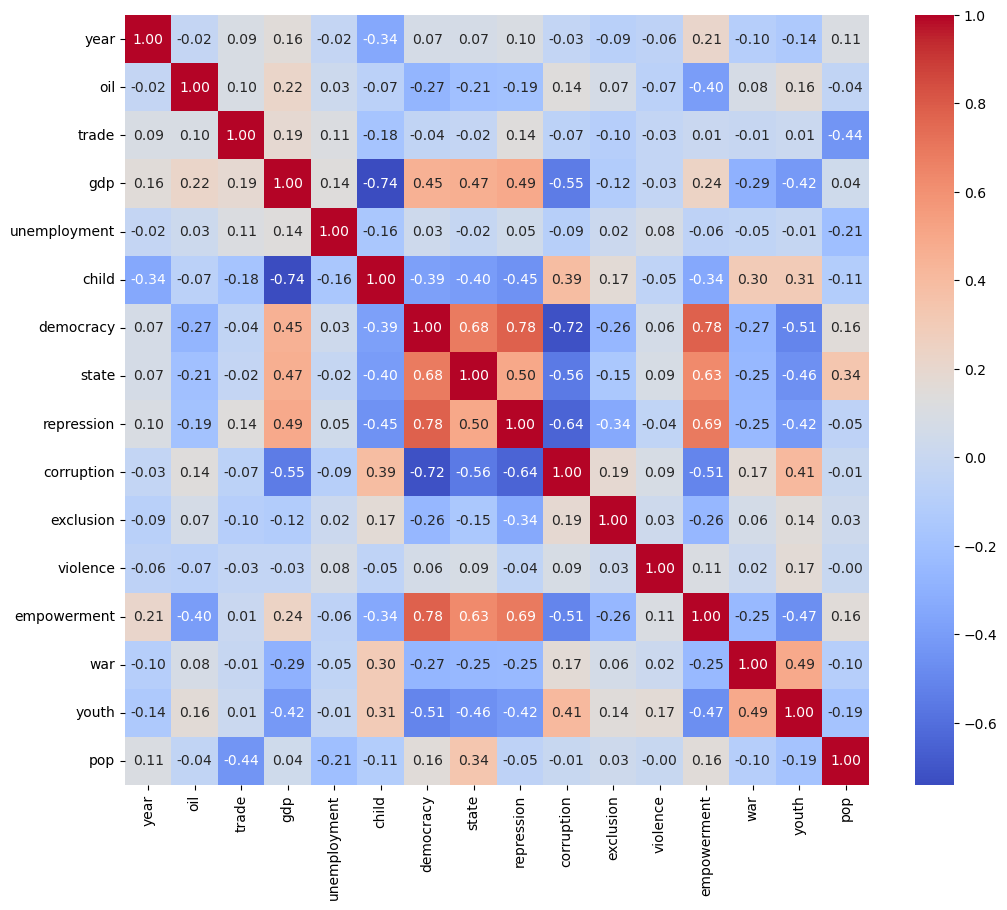

In [507]:
numerical_variables = ['oil', 'trade', 'gdp',
                       'unemployment', 'child', 'democracy', 'state', 'repression',
                       'corruption', 'exclusion', 'violence', 'empowerment', 'war',
                       'youth', 'pop']

plt.figure(figsize=(12, 10))

correlation_matrix = conflict[['year'] + numerical_variables].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [508]:
conflict.describe().T

,count,mean,std,min,25%,50%,75%,max
year,3936.0,2006.500000,9.234266,1991.000000,1998.750000,2006.500000,2014.250000,2.022000e+03
oil,3936.0,4.240849,10.007131,0.000000,0.000000,0.075069,2.049713,6.515760e+01
trade,3936.0,72.928686,36.891411,0.020999,47.050829,64.813465,89.884586,3.479965e+02
gdp,3936.0,8.862756,1.186269,6.064746,7.960944,8.850929,9.613356,1.162518e+01
unemployment,3936.0,8.215457,6.424087,0.095000,3.506000,6.340000,11.100000,3.880000e+01
child,3936.0,58.320783,54.470207,2.500000,15.400000,39.350000,89.125000,3.406000e+02
democracy,3936.0,0.332327,0.240521,0.005000,0.123000,0.275000,0.489250,8.960000e-01
state,3936.0,0.681370,1.187202,-2.917000,-0.181000,0.602000,1.592000,3.178000e+00
repression,3936.0,0.707856,1.443976,-3.212000,-0.470000,0.843000,1.755250,3.297000e+00
corruption,3936.0,0.594107,0.275461,0.004000,0.447000,0.667000,0.816000,9.710000e-01


In [509]:
# conflict.plot(kind='box', subplots= True), layout=(5,3))

In [510]:
# plt.figure(figsize=(12, 6))

# conflict_boxplot = conflict.iloc[:, 3:-4]

# sns.boxplot(data=conflict_boxplot, orient='h')
# plt.title('Boxplots for Each Column')
# plt.show()

In [511]:
# sns.histplot(conflict['population'])

In [512]:
# sns.regplot(x=country["democracy"], y=country_regplot["repression"])

## Número total de muertes por tipo de conflicto 1991-2022

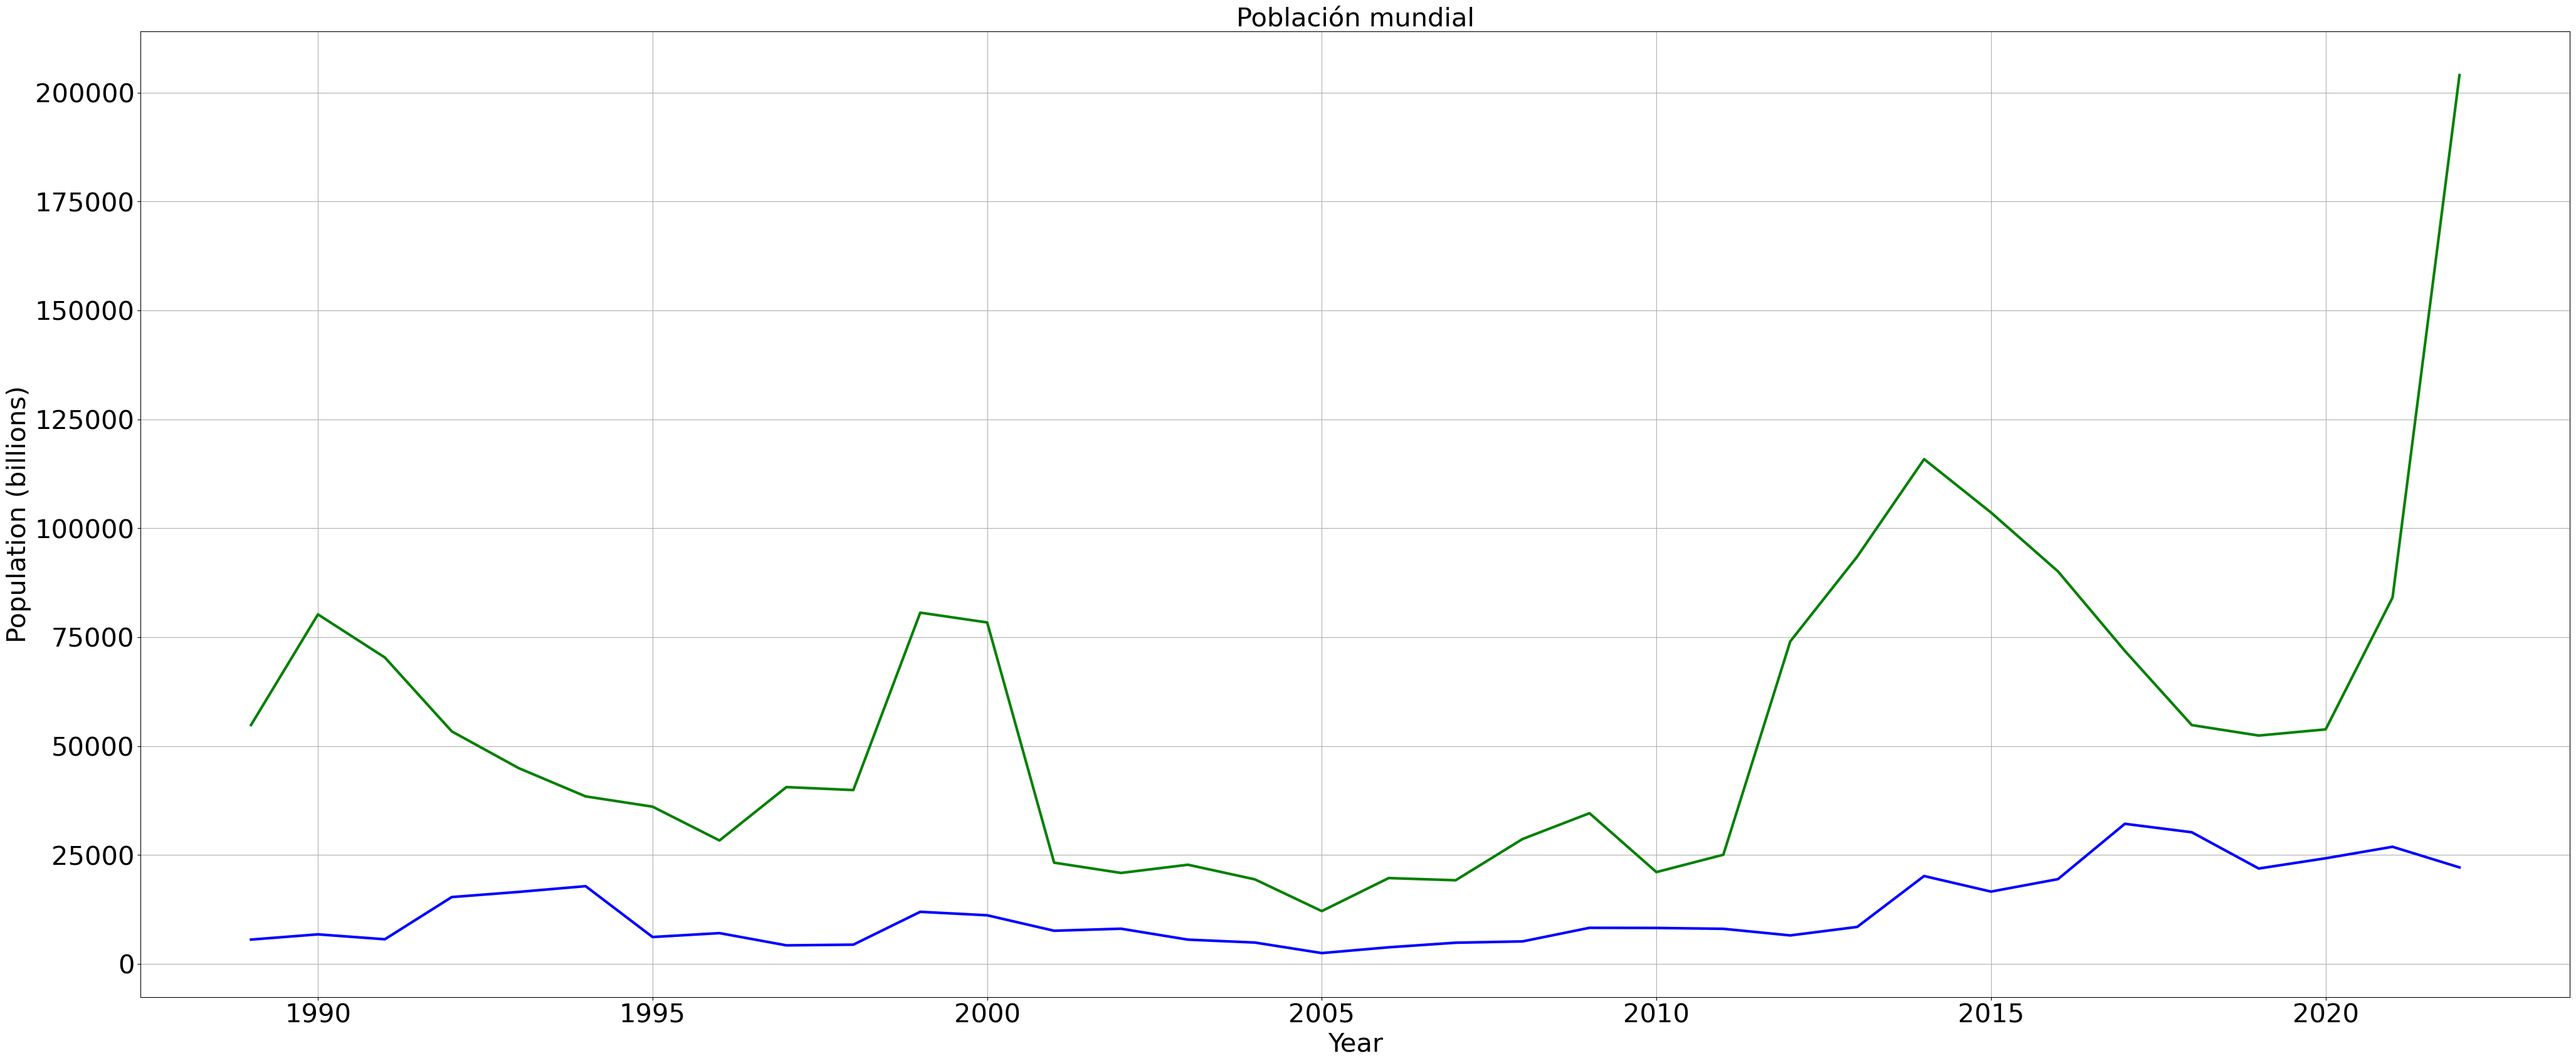

In [513]:
onesided_total_plot = ucdp_onesided.iloc[:, [-7, -10]]
battle_total_plot = ucdp_battle.iloc[:, [11, 12]]
nonstate_total_plot = ucdp_nonstate.iloc[:, [-5, -8]]


plt.figure(figsize=(50, 20))

# plt.plot(onesided_total_plot.groupby(['year']).aggregate(sum), color="red", linewidth=3)
plt.plot(battle_total_plot.groupby(['year']).aggregate(sum), color="green", linewidth=3)
plt.plot(nonstate_total_plot.groupby(['year']).aggregate(sum), color="blue", linewidth=3)

plt.title('Población mundial', fontsize=30)
plt.xlabel('Year', fontsize=30)
plt.ylabel('Population (billions)', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.grid(True)
plt.show()

mapa de los países que han tenido algo de violencia en 2022 por ejemplo.


plot de los tres tipos de violencia desde 1991 a 2022.

Algeria: youthbulge o índice de guerra en comparación a total_incidence.

In [514]:
# conflict_algeria = conflict[conflict['country'] == 'Algeria']
# conflict_algeria = conflict['year']
# plt.figure(figsize=(50, 30))
# plt.plot(conflict_algeria['youth_bulge'], color="blue")
# plt.title('Población mundial', fontsize=30)
# plt.xlabel('Year', fontsize=30)
# plt.ylabel('Population (billions)', fontsize=30)
# plt.xticks(fontsize=30)
# plt.yticks(fontsize=30)
# plt.grid(True)
# plt.show()

In [515]:
# country_regplot = conflict[conflict['country'] == 'Iraq']
# sns.regplot(x=country_regplot["democracy"], y=country_regplot["repression"])

# Modelo

## Mejores parámetros con GridSearch

In [517]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score

independent_vars = ['oil', 'trade', 'gdp',
                    'unemployment', 'child', 'democracy', 'state', 'repression',
                    'corruption', 'exclusion', 'violence', 'empowerment', 'war',
                    'youth', 'pop']
dependent_var = 'nonstate_incidence'

X = conflict[independent_vars]
y = conflict[dependent_var]

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'max_iter': [50, 100, 200, 300],
    'fit_intercept': [True, False],
    'dual': [True, False]
}

model = LogisticRegression()

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

scoring_metric = make_scorer(accuracy_score)

grid_search = GridSearchCV(model, param_grid, cv=cv, scoring=scoring_metric)
grid_search.fit(X, y)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Hyperparameters: {'C': 100, 'dual': False, 'fit_intercept': True, 'max_iter': 50, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.8945609072473875


In [ ]:
# import pandas as pd
# from sklearn.model_selection import cross_val_score, StratifiedKFold
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix, classification_report

# independent_vars = ['oil_exports', 'trade_openness', 'gdp',
#        'unemployment', 'child_mortality', 'democracy', 'state', 'repression',
#        'corruption', 'exclusion', 'violence', 'empowerment', 'war_index',
#        'youth_bulge', 'population']
# dependent_var = 'battle_incidence'

# X = conflict[independent_vars]
# y = conflict[dependent_var]

# unique_countries = conflict['country'].unique()
    
# train_mask = (conflict['year'] >= 1991) & (conflict['year'] <= 2018)
# test_mask = (conflict['year'] > 2018)

# X_train, X_test = conflict[independent_vars][train_mask], conflict[independent_vars][test_mask]
# y_train, y_test = conflict[dependent_var][train_mask], conflict[dependent_var][test_mask]

# model = LogisticRegression()

# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# scoring_metric = make_scorer(accuracy_score)

# cv_results = cross_val_score(model, X_train, y_train, cv=cv, scoring=scoring_metric)

# print(f'Cross-Validation Accuracy: {cv_results.mean():.2f} +/- {cv_results.std():.2f}')

# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

# conf_matrix = confusion_matrix(y_test, y_pred)
# classification_rep = classification_report(y_test, y_pred)

# print(f'Confusion Matrix:\n{conf_matrix}')
# print(f'Classification Report:\n{classification_rep}')

## Modelo para la variable dependiente Onesided

In [519]:
import pandas as pd
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix, classification_report

independent_vars = ['oil', 'trade', 'gdp',
       'unemployment', 'child', 'democracy', 'state', 'repression',
       'corruption', 'exclusion', 'violence', 'empowerment', 'war',
       'youth', 'pop']
dependent_var = 'onesided_incidence'

X = conflict[independent_vars]
y = conflict[dependent_var]

best_params = grid_search.best_params_

model = LogisticRegression(**best_params)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

scoring_metric = make_scorer(accuracy_score)

cv_results = cross_val_score(model, X, y, cv=cv, scoring=scoring_metric)

print(f'Cross-Validation Accuracy: {cv_results.mean():.2f} +/- {cv_results.std():.2f}')

y_pred = cross_val_predict(model, X, y, cv=cv)

conf_matrix = confusion_matrix(y, y_pred)
classification_rep = classification_report(y, y_pred)

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Cross-Validation Accuracy: 0.86 +/- 0.01
Confusion Matrix:
[[3255  109]
 [ 426  146]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      3364
           1       0.57      0.26      0.35       572

    accuracy                           0.86      3936
   macro avg       0.73      0.61      0.64      3936
weighted avg       0.84      0.86      0.84      3936



Text(0.5, 1.0, 'Confusion Matrix')

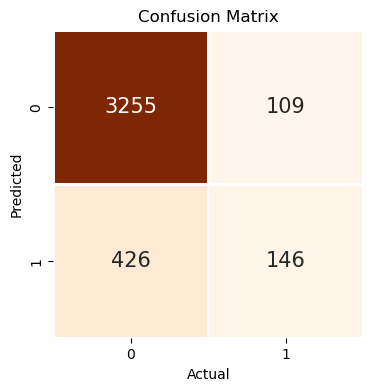

In [520]:
plt.figure(figsize=(4, 4))

sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 15}, cmap="Oranges", fmt='.0f', linewidths=1, linecolor="white", cbar=False,
           xticklabels=['0','1'], yticklabels=['0','1'])
plt.ylabel("Predicted", fontsize=10)
plt.xlabel("Actual", fontsize=10)
plt.title("Confusion Matrix", fontsize=12)

## Modelo para la variable dependiente Nonstate

In [521]:
import pandas as pd
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix, classification_report

independent_vars = ['oil', 'trade', 'gdp',
       'unemployment', 'child', 'democracy', 'state', 'repression',
       'corruption', 'exclusion', 'violence', 'empowerment', 'war',
       'youth', 'pop']
dependent_var = 'nonstate_incidence'

X = conflict[independent_vars]
y = conflict[dependent_var]

best_params = grid_search.best_params_

model = LogisticRegression(**best_params)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

scoring_metric = make_scorer(accuracy_score)

cv_results = cross_val_score(model, X, y, cv=cv, scoring=scoring_metric)

print(f'Cross-Validation Accuracy: {cv_results.mean():.2f} +/- {cv_results.std():.2f}')

y_pred = cross_val_predict(model, X, y, cv=cv)

conf_matrix = confusion_matrix(y, y_pred)
classification_rep = classification_report(y, y_pred)

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Cross-Validation Accuracy: 0.89 +/- 0.01
Confusion Matrix:
[[3320   75]
 [ 342  199]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      3395
           1       0.73      0.37      0.49       541

    accuracy                           0.89      3936
   macro avg       0.82      0.67      0.71      3936
weighted avg       0.88      0.89      0.88      3936



Text(0.5, 1.0, 'Confusion Matrix')

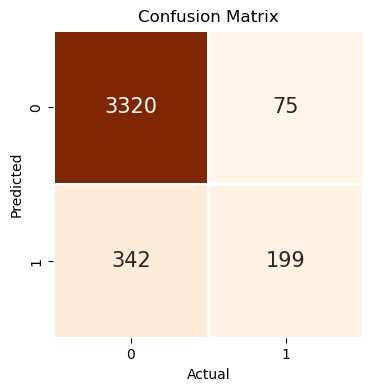

In [522]:
plt.figure(figsize=(4, 4))

sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 15}, cmap="Oranges", fmt='.0f', linewidths=1, linecolor="white", cbar=False,
           xticklabels=['0','1'], yticklabels=['0','1'])
plt.ylabel("Predicted", fontsize=10)
plt.xlabel("Actual", fontsize=10)
plt.title("Confusion Matrix", fontsize=12)

## Modelo para la variable dependiente Battle

In [523]:
import pandas as pd
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix, classification_report

independent_vars = ['oil', 'trade', 'gdp',
       'unemployment', 'child', 'democracy', 'state', 'repression',
       'corruption', 'exclusion', 'violence', 'empowerment', 'war',
       'youth', 'pop']
dependent_var = 'battle_incidence'

X = conflict[independent_vars]
y = conflict[dependent_var]

best_params = grid_search.best_params_

model = LogisticRegression(**best_params)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

scoring_metric = make_scorer(accuracy_score)

cv_results = cross_val_score(model, X, y, cv=cv, scoring=scoring_metric)

print(f'Cross-Validation Accuracy: {cv_results.mean():.2f} +/- {cv_results.std():.2f}')

y_pred = cross_val_predict(model, X, y, cv=cv)

conf_matrix = confusion_matrix(y, y_pred)
classification_rep = classification_report(y, y_pred)

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Cross-Validation Accuracy: 0.80 +/- 0.01
Confusion Matrix:
[[2720  228]
 [ 546  442]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.88      2948
           1       0.66      0.45      0.53       988

    accuracy                           0.80      3936
   macro avg       0.75      0.69      0.70      3936
weighted avg       0.79      0.80      0.79      3936



Text(0.5, 1.0, 'Confusion Matrix')

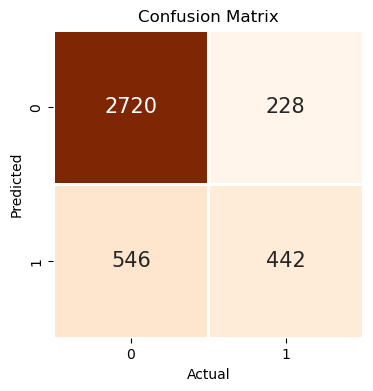

In [524]:
plt.figure(figsize=(4, 4))

sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 15}, cmap="Oranges", fmt='.0f', linewidths=1, linecolor="white", cbar=False,
           xticklabels=['0','1'], yticklabels=['0','1'])
plt.ylabel("Predicted", fontsize=10)
plt.xlabel("Actual", fontsize=10)
plt.title("Confusion Matrix", fontsize=12)

In [ ]:
adsadasd

### Modelo Battle todos los países

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix, classification_report

independent_vars = ['oil_exports', 'trade_openness', 'gdp',
       'unemployment', 'child_mortality', 'democracy', 'state', 'repression',
       'corruption', 'exclusion', 'violence', 'empowerment', 'war_index',
       'youth_bulge', 'population']
dependent_var = 'battle_incidence'

X = conflict[independent_vars]
y = conflict[dependent_var]

unique_countries = conflict['country'].unique()
    
train_mask = (conflict['year'] >= 1991) & (conflict['year'] <= 2018)
test_mask = (conflict['year'] > 2018)

X_train, X_test = conflict[independent_vars][train_mask], conflict[independent_vars][test_mask]
y_train, y_test = conflict[dependent_var][train_mask], conflict[dependent_var][test_mask]

model = LogisticRegression()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring_metric = make_scorer(accuracy_score)

cv_results = cross_val_score(model, X_train, y_train, cv=cv, scoring=scoring_metric)

print(f'Cross-Validation Accuracy: {cv_results.mean():.2f} +/- {cv_results.std():.2f}')

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix, classification_report

independent_vars = ['oil_exports', 'trade_openness', 'gdp',
       'unemployment', 'child_mortality', 'democracy', 'state', 'repression',
       'corruption', 'exclusion', 'violence', 'empowerment', 'war_index',
       'youth_bulge', 'population']
dependent_var = 'battle_incidence'

X = conflict[independent_vars]
y = conflict[dependent_var]

unique_countries = conflict['country'].unique()

X_train, X_test = conflict, conflict
y_train, y_test = conflict, conflict

model = LogisticRegression()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring_metric = make_scorer(accuracy_score)

cv_results = cross_val_score(model, X_train, y_train, cv=cv, scoring=scoring_metric)

print(f'Cross-Validation Accuracy: {cv_results.mean():.2f} +/- {cv_results.std():.2f}')

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')